In [1]:
from pprint import pprint
from math import ceil
from itertools import product
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from helpers import load_best_result, save_search_result
from loaders import load_mnist
from plotters import gen_and_plot_learning_curve, plot_learning_curve, gen_and_plot_validation_curve, plot_validation_curve

### Load Data

In [2]:
df = load_mnist(preprocess=True)

1    6958
0    6824
Name: target, dtype: int64


/home/jovyan/loaders.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  filtered_df['target'] = le.fit_transform(filtered_df['target'])


### Split data into training and testing

In [3]:
from sklearn.model_selection import train_test_split

X = df[[c for c in df.columns if c != 'target']]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

### Scale Data

In [4]:
# Use min max scaling because input dataset is sparse, i.e. mostly zeros
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Neural Nets

In [5]:
# Build a KerasClassifier for use with scikit-learn
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.wrappers.scikit_learn import KerasClassifier


n_features = X_train.shape[1]


def build_keras_clf(hidden_layer_sizes=(10,10), learning_rate_init=0.01, momentum=0.8):
    """This function builds a Keras model for use with scikit's GridSearch"""
    if not isinstance(hidden_layer_sizes, tuple):
        hidden_layer_sizes = (hidden_layer_sizes,)
    
    model = Sequential()
    
    model.add(Dense(units=n_features, input_shape=(n_features,), activation='relu'))
    
    for layer_size in hidden_layer_sizes:
        assert layer_size > 0
        model.add(Dense(units=layer_size, activation='relu'))
    
    # Add output layer
    model.add(Dense(units=1, activation='sigmoid'))
        
    sgd = SGD(lr=learning_rate_init, momentum=momentum, nesterov=True)
    model.compile(loss='mean_squared_error', optimizer=sgd, metrics=["accuracy"])
    
    return model

clf = KerasClassifier(build_fn=build_keras_clf)

Using TensorFlow backend.


### GridSearch for model complexity curves

In [8]:
layer_sizes = [
#     1,
#     10,
#     100,
#     (1,1),
    (10,10),
    (100,100)
]

param_grid = {
    'hidden_layer_sizes': layer_sizes,
#     'learning_rate_init': [.05, .1, .2],
#     'momentum': [0.7, 0.8, 0.9],
    'epochs': [1, 10, 100, 200],
#     'batch_size': [32, 64, 128]
}

In [9]:
# grid_search = GridSearchCV(
#     estimator=clf,
#     param_grid=param_grid,
#     scoring='accuracy',
#     return_train_score=True,
#     cv=4,
#     verbose=0,
#     n_jobs=-1,
# )

In [10]:
grid_search.fit(X_train_scaled, y_train)

Epoch 1/1
Epoch 1/1
7236/7236 [==============================] - 7s 949us/step - loss: 0.1204 - acc: 0.8474
Epoch 1/1
Epoch 1/1
Epoch 1/1
7236/7236 [==============================] - 8s 1ms/step - loss: 0.0998 - acc: 0.8934
Epoch 1/10
Epoch 1/10
Epoch 1/10
7235/7235 [==============================] - 7s 924us/step - loss: 0.0312 - acc: 0.9646
Epoch 3/10
7235/7235 [==============================] - 7s 917us/step - loss: 0.0200 - acc: 0.9772
Epoch 5/10
7235/7235 [==============================] - 7s 991us/step - loss: 0.0192 - acc: 0.9779
Epoch 5/10
7235/7235 [==============================] - 7s 1ms/step - loss: 0.0171 - acc: 0.9812
Epoch 6/10
7236/7236 [==============================] - 6s 896us/step - loss: 0.0198 - acc: 0.9775
Epoch 6/10
7236/7236 [==============================] - 6s 890us/step - loss: 0.0172 - acc: 0.9805
Epoch 7/10
7236/7236 [==============================] - 7s 923us/step - loss: 0.0132 - acc: 0.9852
Epoch 9/10
7235/7235 [==============================] - 6s 865u

7235/7235 [==============================] - 6s 897us/step - loss: 0.0106 - acc: 0.9888
Epoch 9/100
7235/7235 [==============================] - 7s 945us/step - loss: 0.0102 - acc: 0.9887
Epoch 9/100
7236/7236 [==============================] - 7s 925us/step - loss: 0.0120 - acc: 0.9858
Epoch 9/100
7235/7235 [==============================] - 7s 902us/step - loss: 0.0097 - acc: 0.9892
Epoch 10/100
7236/7236 [==============================] - 7s 985us/step - loss: 0.0089 - acc: 0.9902
Epoch 11/100
7235/7235 [==============================] - 7s 998us/step - loss: 0.0072 - acc: 0.9936
Epoch 12/100
7235/7235 [==============================] - 7s 902us/step - loss: 0.0064 - acc: 0.9934
Epoch 12/100
7236/7236 [==============================] - 6s 867us/step - loss: 0.0062 - acc: 0.9942
Epoch 13/100
7235/7235 [==============================] - 6s 858us/step - loss: 0.0055 - acc: 0.9957
Epoch 14/100
7236/7236 [==============================] - 7s 949us/step - loss: 0.0055 - acc: 0.9950
Epoch 

7235/7235 [==============================] - 7s 1ms/step - loss: 8.9953e-04 - acc: 0.9993
Epoch 37/100
7235/7235 [==============================] - 7s 995us/step - loss: 7.8264e-04 - acc: 0.9996
Epoch 37/100
7236/7236 [==============================] - 7s 959us/step - loss: 8.3046e-04 - acc: 0.9994
Epoch 37/100
7235/7235 [==============================] - 7s 924us/step - loss: 8.8787e-04 - acc: 0.9993
Epoch 38/100
7236/7236 [==============================] - 7s 996us/step - loss: 7.9634e-04 - acc: 0.9994
Epoch 38/100
7235/7235 [==============================] - 7s 998us/step - loss: 8.7313e-04 - acc: 0.9993
Epoch 39/100
7235/7235 [==============================] - 7s 924us/step - loss: 7.3620e-04 - acc: 0.9994
Epoch 39/100
7236/7236 [==============================] - 7s 929us/step - loss: 7.5047e-04 - acc: 0.9994
Epoch 39/100
7235/7235 [==============================] - 7s 955us/step - loss: 8.5621e-04 - acc: 0.9993
Epoch 41/100
7235/7235 [==============================] - 6s 890us/ste

7236/7236 [==============================] - 6s 847us/step - loss: 4.9132e-04 - acc: 0.9996
Epoch 65/100
7235/7235 [==============================] - 6s 886us/step - loss: 4.9517e-04 - acc: 0.9996
Epoch 67/100
7236/7236 [==============================] - 6s 888us/step - loss: 4.8997e-04 - acc: 0.9996
Epoch 66/100
7235/7235 [==============================] - 6s 830us/step - loss: 4.8361e-04 - acc: 0.9996
Epoch 67/100
7235/7235 [==============================] - 6s 851us/step - loss: 4.8220e-04 - acc: 0.9996
Epoch 68/100
7235/7235 [==============================] - 6s 887us/step - loss: 4.8049e-04 - acc: 0.9996
Epoch 69/100
7235/7235 [==============================] - 6s 857us/step - loss: 4.8618e-04 - acc: 0.9996
Epoch 70/100
7235/7235 [==============================] - 6s 847us/step - loss: 4.7880e-04 - acc: 0.9996
Epoch 70/100
7235/7235 [==============================] - 6s 854us/step - loss: 4.7154e-04 - acc: 0.9996
Epoch 71/100
7235/7235 [==============================] - 6s 858us/s

7236/7236 [==============================] - 7s 948us/step - loss: 4.5703e-04 - acc: 0.9996
Epoch 92/100
7236/7236 [==============================] - 7s 976us/step - loss: 4.5613e-04 - acc: 0.9996
Epoch 93/100
7235/7235 [==============================] - 8s 1ms/step - loss: 4.5462e-04 - acc: 0.9996
Epoch 95/100
7235/7235 [==============================] - 8s 1ms/step - loss: 4.5388e-04 - acc: 0.9996
Epoch 95/100
7235/7235 [==============================] - 8s 1ms/step - loss: 3.2279e-04 - acc: 0.9997
Epoch 97/100
7235/7235 [==============================] - 8s 1ms/step - loss: 4.5000e-04 - acc: 0.9996
Epoch 97/100
7236/7236 [==============================] - 10s 1ms/step - loss: 4.5319e-04 - acc: 0.9996
Epoch 97/100
7235/7235 [==============================] - 10s 1ms/step - loss: 3.2146e-04 - acc: 0.9997
Epoch 98/100
7236/7236 [==============================] - 7s 1ms/step - loss: 4.5264e-04 - acc: 0.9996
Epoch 98/100
7235/7235 [==============================] - 7s 980us/step - loss: 

7235/7235 [==============================] - 7s 1ms/step - loss: 0.0022 - acc: 0.9986
Epoch 21/100
7236/7236 [==============================] - 7s 1000us/step - loss: 0.0027 - acc: 0.9981
Epoch 21/100
7235/7235 [==============================] - 8s 1ms/step - loss: 0.0025 - acc: 0.9979
Epoch 22/100
7235/7235 [==============================] - 7s 1ms/step - loss: 0.0022 - acc: 0.9988
Epoch 22/100
7235/7235 [==============================] - 7s 987us/step - loss: 0.0020 - acc: 0.9988
Epoch 22/100
7236/7236 [==============================] - 7s 1ms/step - loss: 0.0025 - acc: 0.9985
Epoch 22/100
7235/7235 [==============================] - 8s 1ms/step - loss: 0.0019 - acc: 0.9986
Epoch 23/100
7236/7236 [==============================] - 8s 1ms/step - loss: 0.0021 - acc: 0.9988
Epoch 23/100
7235/7235 [==============================] - 8s 1ms/step - loss: 0.0021 - acc: 0.9985
Epoch 24/100
7235/7235 [==============================] - 8s 1ms/step - loss: 0.0017 - acc: 0.9989
Epoch 24/100
7236/

7235/7235 [==============================] - 7s 902us/step - loss: 7.0187e-04 - acc: 0.9994
Epoch 48/100
7235/7235 [==============================] - 7s 929us/step - loss: 4.9781e-04 - acc: 0.9997
Epoch 48/100
7236/7236 [==============================] - 7s 927us/step - loss: 6.9312e-04 - acc: 0.9994
Epoch 48/100
7235/7235 [==============================] - 7s 956us/step - loss: 6.9305e-04 - acc: 0.9994
Epoch 49/100
7236/7236 [==============================] - 7s 899us/step - loss: 6.8616e-04 - acc: 0.9994
Epoch 49/100
7235/7235 [==============================] - 6s 890us/step - loss: 7.2607e-04 - acc: 0.9994
Epoch 50/100
7235/7235 [==============================] - 7s 953us/step - loss: 6.8788e-04 - acc: 0.9994
Epoch 50/100
7235/7235 [==============================] - 7s 955us/step - loss: 6.8176e-04 - acc: 0.9994
Epoch 51/100
7236/7236 [==============================] - 8s 1ms/step - loss: 6.7632e-04 - acc: 0.9994
Epoch 51/100
7235/7235 [==============================] - 7s 1ms/step 

7236/7236 [==============================] - 6s 892us/step - loss: 6.1428e-04 - acc: 0.9994
Epoch 74/100
7236/7236 [==============================] - 7s 930us/step - loss: 6.1286e-04 - acc: 0.9994
Epoch 75/100
7235/7235 [==============================] - 7s 970us/step - loss: 6.1297e-04 - acc: 0.9994
Epoch 76/100
7235/7235 [==============================] - 6s 854us/step - loss: 3.7262e-04 - acc: 0.9997
Epoch 78/100
7236/7236 [==============================] - 7s 924us/step - loss: 6.0866e-04 - acc: 0.9994
Epoch 78/100
7235/7235 [==============================] - 7s 912us/step - loss: 6.0786e-04 - acc: 0.9994
Epoch 80/100
7236/7236 [==============================] - 7s 915us/step - loss: 6.0661e-04 - acc: 0.9994
Epoch 80/100
7235/7235 [==============================] - 7s 950us/step - loss: 3.3938e-04 - acc: 0.9997
Epoch 81/100
7235/7235 [==============================] - 6s 889us/step - loss: 3.3148e-04 - acc: 0.9997
Epoch 81/100
7236/7236 [==============================] - 7s 935us/s

7235/7235 [==============================] - 5s 725us/step - loss: 0.0881 - acc: 0.9001
Epoch 2/200
7235/7235 [==============================] - 5s 665us/step - loss: 0.0291 - acc: 0.9656
Epoch 3/200
7236/7236 [==============================] - 6s 779us/step - loss: 0.1124 - acc: 0.8796
Epoch 2/200
7235/7235 [==============================] - 5s 737us/step - loss: 0.0282 - acc: 0.9660
Epoch 3/200
7235/7235 [==============================] - 6s 766us/step - loss: 0.0217 - acc: 0.9735
Epoch 4/200
7235/7235 [==============================] - 6s 796us/step - loss: 0.0182 - acc: 0.9786
Epoch 5/200
7235/7235 [==============================] - 5s 758us/step - loss: 0.0189 - acc: 0.9779
Epoch 5/200
7235/7235 [==============================] - 5s 714us/step - loss: 0.0186 - acc: 0.9765
Epoch 4/200
Epoch 5/200
7235/7235 [==============================] - 5s 694us/step - loss: 0.0159 - acc: 0.9813
Epoch 6/200
7235/7235 [==============================] - 5s 742us/step - loss: 0.0159 - acc: 0.9824


7236/7236 [==============================] - 5s 743us/step - loss: 0.0011 - acc: 0.9993
Epoch 30/200
7235/7235 [==============================] - 6s 769us/step - loss: 8.2288e-04 - acc: 0.9994
Epoch 31/200
7235/7235 [==============================] - 5s 703us/step - loss: 0.0010 - acc: 0.9993
Epoch 32/200
7236/7236 [==============================] - 5s 684us/step - loss: 0.0011 - acc: 0.9993
Epoch 31/200
7235/7235 [==============================] - 7s 914us/step - loss: 9.5795e-04 - acc: 0.9993
Epoch 33/200
7235/7235 [==============================] - 7s 958us/step - loss: 7.2073e-04 - acc: 0.9996
Epoch 33/200
7235/7235 [==============================] - 7s 939us/step - loss: 9.4659e-04 - acc: 0.9993
Epoch 34/200
7235/7235 [==============================] - 6s 870us/step - loss: 6.8517e-04 - acc: 0.9996
Epoch 34/200
7236/7236 [==============================] - 6s 810us/step - loss: 8.9036e-04 - acc: 0.9994
Epoch 34/200
7235/7235 [==============================] - 6s 818us/step - loss: 

7235/7235 [==============================] - 5s 756us/step - loss: 5.0748e-04 - acc: 0.9996
Epoch 57/200
7235/7235 [==============================] - 5s 753us/step - loss: 3.7883e-04 - acc: 0.9997
Epoch 57/200
7235/7235 [==============================] - 6s 835us/step - loss: 5.0333e-04 - acc: 0.9996
Epoch 58/200
7236/7236 [==============================] - 5s 745us/step - loss: 6.2783e-04 - acc: 0.9994
Epoch 58/200
7235/7235 [==============================] - 6s 781us/step - loss: 4.9910e-04 - acc: 0.9996
Epoch 59/200
7236/7236 [==============================] - 6s 829us/step - loss: 6.1420e-04 - acc: 0.9994
Epoch 59/200
7235/7235 [==============================] - 5s 754us/step - loss: 6.3929e-04 - acc: 0.9994
Epoch 61/200
7235/7235 [==============================] - 6s 772us/step - loss: 3.6556e-04 - acc: 0.9997
Epoch 61/200
7235/7235 [==============================] - 5s 742us/step - loss: 6.3558e-04 - acc: 0.9994
Epoch 62/200
7235/7235 [==============================] - 6s 779us/s

7235/7235 [==============================] - 5s 683us/step - loss: 5.9851e-04 - acc: 0.9994
Epoch 85/200
7236/7236 [==============================] - 5s 703us/step - loss: 4.6575e-04 - acc: 0.9996
Epoch 84/200
7235/7235 [==============================] - 5s 724us/step - loss: 5.9806e-04 - acc: 0.9994
Epoch 86/200
7235/7235 [==============================] - 5s 694us/step - loss: 3.3224e-04 - acc: 0.9997
Epoch 86/200
7235/7235 [==============================] - 5s 676us/step - loss: 3.3079e-04 - acc: 0.9997
Epoch 87/200
7236/7236 [==============================] - 5s 733us/step - loss: 4.6274e-04 - acc: 0.9996
Epoch 87/200
7235/7235 [==============================] - 5s 719us/step - loss: 3.2145e-04 - acc: 0.9997
Epoch 88/200
7235/7235 [==============================] - 5s 733us/step - loss: 3.2938e-04 - acc: 0.9997
Epoch 88/200
7235/7235 [==============================] - 6s 774us/step - loss: 5.9156e-04 - acc: 0.9994
Epoch 90/200
7236/7236 [==============================] - 6s 867us/s

7235/7235 [==============================] - 6s 888us/step - loss: 3.0659e-04 - acc: 0.9997
Epoch 113/200
7236/7236 [==============================] - 6s 840us/step - loss: 4.4545e-04 - acc: 0.9996
Epoch 113/200
7235/7235 [==============================] - 6s 822us/step - loss: 3.0972e-04 - acc: 0.9997
Epoch 114/200
7235/7235 [==============================] - 6s 839us/step - loss: 3.0635e-04 - acc: 0.9997
Epoch 114/200
7235/7235 [==============================] - 6s 827us/step - loss: 4.4598e-04 - acc: 0.9996
Epoch 115/200
7235/7235 [==============================] - 6s 814us/step - loss: 3.0883e-04 - acc: 0.9997
Epoch 116/200
7236/7236 [==============================] - 6s 860us/step - loss: 4.4469e-04 - acc: 0.9996
Epoch 115/200
7235/7235 [==============================] - 6s 849us/step - loss: 3.0536e-04 - acc: 0.9997
Epoch 116/200
7235/7235 [==============================] - 7s 958us/step - loss: 3.0798e-04 - acc: 0.9997
Epoch 117/200
7236/7236 [==============================] - 6

7236/7236 [==============================] - 6s 859us/step - loss: 4.3685e-04 - acc: 0.9996
Epoch 140/200
7235/7235 [==============================] - 6s 841us/step - loss: 2.9826e-04 - acc: 0.9997
Epoch 141/200
7236/7236 [==============================] - 6s 883us/step - loss: 4.3665e-04 - acc: 0.9996
Epoch 141/200
7235/7235 [==============================] - 6s 838us/step - loss: 2.9793e-04 - acc: 0.9997
Epoch 142/200
7235/7235 [==============================] - 6s 862us/step - loss: 2.9954e-04 - acc: 0.9997
Epoch 143/200
7235/7235 [==============================] - 6s 861us/step - loss: 2.9784e-04 - acc: 0.9997
Epoch 143/200
7235/7235 [==============================] - 6s 854us/step - loss: 4.3633e-04 - acc: 0.9996
Epoch 144/200
7235/7235 [==============================] - 6s 811us/step - loss: 2.9756e-04 - acc: 0.9997
Epoch 144/200
7236/7236 [==============================] - 6s 876us/step - loss: 4.3573e-04 - acc: 0.9996
Epoch 145/200
7235/7235 [==============================] - 6

7235/7235 [==============================] - 6s 844us/step - loss: 2.9455e-04 - acc: 0.9997
Epoch 168/200
7235/7235 [==============================] - 6s 803us/step - loss: 2.9442e-04 - acc: 0.9997
Epoch 169/200
7235/7235 [==============================] - 6s 847us/step - loss: 4.3153e-04 - acc: 0.9996
Epoch 170/200
7235/7235 [==============================] - 6s 833us/step - loss: 2.9304e-04 - acc: 0.9997
Epoch 171/200
7236/7236 [==============================] - 6s 836us/step - loss: 4.3118e-04 - acc: 0.9996
Epoch 171/200
7236/7236 [==============================] - 6s 808us/step - loss: 4.3109e-04 - acc: 0.9996
Epoch 172/200
7235/7235 [==============================] - 6s 804us/step - loss: 2.9378e-04 - acc: 0.9997
Epoch 173/200
7236/7236 [==============================] - 6s 800us/step - loss: 4.3094e-04 - acc: 0.9996
Epoch 173/200
7235/7235 [==============================] - 6s 847us/step - loss: 4.3102e-04 - acc: 0.9996
Epoch 174/200
7235/7235 [==============================] - 6

7235/7235 [==============================] - 6s 860us/step - loss: 2.9115e-04 - acc: 0.9997
Epoch 194/200
7235/7235 [==============================] - 6s 839us/step - loss: 2.9035e-04 - acc: 0.9997
Epoch 194/200
7235/7235 [==============================] - 6s 770us/step - loss: 2.9105e-04 - acc: 0.9997
Epoch 195/200
7235/7235 [==============================] - 6s 838us/step - loss: 2.9091e-04 - acc: 0.9997
Epoch 196/200
7236/7236 [==============================] - 6s 772us/step - loss: 4.2835e-04 - acc: 0.9996
Epoch 196/200
7235/7235 [==============================] - 6s 780us/step - loss: 2.9086e-04 - acc: 0.9997
Epoch 197/200
7236/7236 [==============================] - 6s 804us/step - loss: 4.2826e-04 - acc: 0.9996
Epoch 197/200
7235/7235 [==============================] - 6s 783us/step - loss: 4.2829e-04 - acc: 0.9996
Epoch 198/200
7235/7235 [==============================] - 6s 813us/step - loss: 2.9071e-04 - acc: 0.9997
Epoch 198/200
7235/7235 [==============================] - 6

7235/7235 [==============================] - 7s 1ms/step - loss: 0.0022 - acc: 0.9983
Epoch 23/200
7235/7235 [==============================] - 8s 1ms/step - loss: 0.0016 - acc: 0.9990
Epoch 23/200
7235/7235 [==============================] - 7s 1ms/step - loss: 0.0017 - acc: 0.9988
Epoch 25/200
7235/7235 [==============================] - 8s 1ms/step - loss: 0.0018 - acc: 0.9985
Epoch 25/200
7235/7235 [==============================] - 8s 1ms/step - loss: 0.0013 - acc: 0.9992
Epoch 25/200
7235/7235 [==============================] - 7s 966us/step - loss: 0.0016 - acc: 0.9988
Epoch 26/200
7235/7235 [==============================] - 7s 988us/step - loss: 0.0012 - acc: 0.9993
Epoch 26/200
7235/7235 [==============================] - 7s 953us/step - loss: 0.0015 - acc: 0.9989
Epoch 27/200
7235/7235 [==============================] - 8s 1ms/step - loss: 0.0012 - acc: 0.9993
Epoch 27/200
7235/7235 [==============================] - 8s 1ms/step - loss: 0.0013 - acc: 0.9992
Epoch 28/200
7235

7235/7235 [==============================] - 7s 993us/step - loss: 6.7358e-04 - acc: 0.9994
Epoch 49/200
7236/7236 [==============================] - 7s 988us/step - loss: 4.3563e-04 - acc: 0.9997
Epoch 49/200
7235/7235 [==============================] - 7s 1ms/step - loss: 6.6772e-04 - acc: 0.9994
Epoch 50/200
7235/7235 [==============================] - 7s 974us/step - loss: 6.6498e-04 - acc: 0.9994
Epoch 51/200
7235/7235 [==============================] - 7s 964us/step - loss: 4.1574e-04 - acc: 0.9997
Epoch 51/200
7235/7235 [==============================] - 7s 1ms/step - loss: 6.5126e-04 - acc: 0.9994
Epoch 52/200
7235/7235 [==============================] - 7s 996us/step - loss: 3.9310e-04 - acc: 0.9997
Epoch 52/200
7235/7235 [==============================] - 7s 1ms/step - loss: 6.1486e-04 - acc: 0.9994
Epoch 53/200
7235/7235 [==============================] - 8s 1ms/step - loss: 5.4915e-04 - acc: 0.9996
Epoch 54/200
7235/7235 [==============================] - 7s 1ms/step - loss

7235/7235 [==============================] - 8s 1ms/step - loss: 1.9964e-04 - acc: 0.9999
Epoch 78/200
7235/7235 [==============================] - 7s 1ms/step - loss: 3.3411e-04 - acc: 0.9997
Epoch 79/200
7235/7235 [==============================] - 7s 1ms/step - loss: 3.3272e-04 - acc: 0.9997
Epoch 80/200
7235/7235 [==============================] - 7s 987us/step - loss: 5.9954e-04 - acc: 0.9994
Epoch 80/200
7235/7235 [==============================] - 8s 1ms/step - loss: 1.9757e-04 - acc: 0.9999
Epoch 80/200
7236/7236 [==============================] - 7s 929us/step - loss: 3.3263e-04 - acc: 0.9997
Epoch 80/200
7235/7235 [==============================] - 7s 1ms/step - loss: 1.9613e-04 - acc: 0.9999
Epoch 81/200
7235/7235 [==============================] - 7s 1ms/step - loss: 3.3000e-04 - acc: 0.9997
Epoch 82/200
7235/7235 [==============================] - 8s 1ms/step - loss: 5.9751e-04 - acc: 0.9994
Epoch 82/200
7235/7235 [==============================] - 8s 1ms/step - loss: 1.94

7235/7235 [==============================] - 8s 1ms/step - loss: 1.7410e-04 - acc: 0.9999
Epoch 106/200
7235/7235 [==============================] - 6s 865us/step - loss: 1.7352e-04 - acc: 0.9999
Epoch 107/200
7236/7236 [==============================] - 6s 848us/step - loss: 3.1137e-04 - acc: 0.9997
Epoch 106/200
7235/7235 [==============================] - 6s 852us/step - loss: 3.0960e-04 - acc: 0.9997
Epoch 108/200
7236/7236 [==============================] - 6s 891us/step - loss: 3.1084e-04 - acc: 0.9997
Epoch 107/200
7236/7236 [==============================] - 6s 847us/step - loss: 3.0998e-04 - acc: 0.9997
Epoch 108/200
7235/7235 [==============================] - 6s 852us/step - loss: 4.1756e-04 - acc: 0.9996
Epoch 109/200
7236/7236 [==============================] - 7s 948us/step - loss: 3.0968e-04 - acc: 0.9997
Epoch 109/200
7235/7235 [==============================] - 7s 954us/step - loss: 3.5359e-04 - acc: 0.9997
Epoch 111/200
7235/7235 [==============================] - 6s 

7235/7235 [==============================] - 6s 810us/step - loss: 1.6340e-04 - acc: 0.9999
Epoch 132/200
7236/7236 [==============================] - 6s 853us/step - loss: 3.0152e-04 - acc: 0.9997
Epoch 131/200
7236/7236 [==============================] - 6s 813us/step - loss: 3.0149e-04 - acc: 0.9997
Epoch 132/200
7235/7235 [==============================] - 6s 818us/step - loss: 3.0634e-04 - acc: 0.9997
Epoch 133/200
7235/7235 [==============================] - 6s 835us/step - loss: 3.0014e-04 - acc: 0.9997
Epoch 134/200
7235/7235 [==============================] - 6s 801us/step - loss: 1.6282e-04 - acc: 0.9999
Epoch 134/200
7236/7236 [==============================] - 6s 830us/step - loss: 3.0097e-04 - acc: 0.9997
Epoch 133/200
7235/7235 [==============================] - 6s 853us/step - loss: 2.9981e-04 - acc: 0.9997
Epoch 135/200
7235/7235 [==============================] - 6s 852us/step - loss: 1.6240e-04 - acc: 0.9999
Epoch 135/200
7235/7235 [==============================] - 6

7236/7236 [==============================] - 6s 892us/step - loss: 2.9521e-04 - acc: 0.9997
Epoch 159/200
7236/7236 [==============================] - 6s 827us/step - loss: 2.9532e-04 - acc: 0.9997
Epoch 160/200
7235/7235 [==============================] - 6s 877us/step - loss: 2.9652e-04 - acc: 0.9997
Epoch 162/200
7236/7236 [==============================] - 6s 842us/step - loss: 2.9496e-04 - acc: 0.9997
Epoch 161/200
7235/7235 [==============================] - 6s 834us/step - loss: 2.9413e-04 - acc: 0.9997
Epoch 163/200
7235/7235 [==============================] - 6s 824us/step - loss: 2.9632e-04 - acc: 0.9997
Epoch 163/200
7235/7235 [==============================] - 6s 843us/step - loss: 1.5628e-04 - acc: 0.9999
Epoch 164/200
7235/7235 [==============================] - 6s 811us/step - loss: 2.9399e-04 - acc: 0.9997
Epoch 164/200
7235/7235 [==============================] - 6s 832us/step - loss: 1.5626e-04 - acc: 0.9999
Epoch 165/200
7235/7235 [==============================] - 6

7236/7236 [==============================] - 7s 908us/step - loss: 2.9150e-04 - acc: 0.9997
Epoch 186/200
7235/7235 [==============================] - 6s 884us/step - loss: 1.5316e-04 - acc: 0.9999
Epoch 188/200
7235/7235 [==============================] - 6s 872us/step - loss: 2.9207e-04 - acc: 0.9997
Epoch 188/200
7236/7236 [==============================] - 6s 807us/step - loss: 2.9126e-04 - acc: 0.9997
Epoch 188/200
7235/7235 [==============================] - 6s 863us/step - loss: 1.5295e-04 - acc: 0.9999
Epoch 190/200
7235/7235 [==============================] - 6s 817us/step - loss: 2.9179e-04 - acc: 0.9997
Epoch 190/200
7235/7235 [==============================] - 6s 842us/step - loss: 2.9061e-04 - acc: 0.9997
Epoch 191/200
7235/7235 [==============================] - 6s 865us/step - loss: 1.5282e-04 - acc: 0.9999
Epoch 191/200
7235/7235 [==============================] - 6s 833us/step - loss: 2.9170e-04 - acc: 0.9997
Epoch 191/200
7235/7235 [==============================] - 6

Epoch 200/200
7236/7236 [==============================] - 2s 307us/step - loss: 2.8988e-04 - acc: 0.9997
Epoch 1/100
9647/9647 [==============================] - 3s 276us/step - loss: 0.0746 - acc: 0.9239
Epoch 2/100
9647/9647 [==============================] - 3s 282us/step - loss: 0.0277 - acc: 0.9668
Epoch 3/100
9647/9647 [==============================] - 3s 282us/step - loss: 0.0220 - acc: 0.9743
Epoch 4/100
9647/9647 [==============================] - 3s 268us/step - loss: 0.0183 - acc: 0.9774
Epoch 5/100
9647/9647 [==============================] - 3s 278us/step - loss: 0.0156 - acc: 0.9808
Epoch 6/100
9647/9647 [==============================] - 3s 283us/step - loss: 0.0131 - acc: 0.9853
Epoch 7/100
9647/9647 [==============================] - 3s 275us/step - loss: 0.0115 - acc: 0.9878
Epoch 8/100
9647/9647 [==============================] - 3s 272us/step - loss: 0.0096 - acc: 0.9898
Epoch 9/100
9647/9647 [==============================] - 3s 294us/step - loss: 0.0083 - acc: 0

9647/9647 [==============================] - 3s 285us/step - loss: 3.5077e-04 - acc: 0.9997
Epoch 80/100
9647/9647 [==============================] - 3s 284us/step - loss: 3.4991e-04 - acc: 0.9997
Epoch 81/100
9647/9647 [==============================] - 3s 351us/step - loss: 3.4905e-04 - acc: 0.9997
Epoch 82/100
9647/9647 [==============================] - 3s 299us/step - loss: 3.4827e-04 - acc: 0.9997
Epoch 83/100
9647/9647 [==============================] - 3s 290us/step - loss: 3.4769e-04 - acc: 0.9997
Epoch 84/100
9647/9647 [==============================] - 3s 271us/step - loss: 3.4704e-04 - acc: 0.9997
Epoch 85/100
9647/9647 [==============================] - 3s 290us/step - loss: 3.4612e-04 - acc: 0.9997
Epoch 86/100
9647/9647 [==============================] - 3s 277us/step - loss: 3.4559e-04 - acc: 0.9997
Epoch 87/100
9647/9647 [==============================] - 3s 291us/step - loss: 3.4480e-04 - acc: 0.9997
Epoch 88/100
9647/9647 [==============================] - 3s 287us/s

GridSearchCV(cv=4, error_score='raise',
       estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f2bd1a98b38>,
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'hidden_layer_sizes': [(10, 10), (100, 100)], 'epochs': [1, 10, 100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [11]:
save_search_result(grid_search, 'MNIST', 'ANN')

### Model Complexity Analysis

In [12]:
res = grid_search.cv_results_

In [13]:
res.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_epochs', 'param_hidden_layer_sizes', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'mean_train_score', 'std_train_score'])

In [14]:
res['params']

[{'epochs': 1, 'hidden_layer_sizes': (10, 10)},
 {'epochs': 1, 'hidden_layer_sizes': (100, 100)},
 {'epochs': 10, 'hidden_layer_sizes': (10, 10)},
 {'epochs': 10, 'hidden_layer_sizes': (100, 100)},
 {'epochs': 100, 'hidden_layer_sizes': (10, 10)},
 {'epochs': 100, 'hidden_layer_sizes': (100, 100)},
 {'epochs': 200, 'hidden_layer_sizes': (10, 10)},
 {'epochs': 200, 'hidden_layer_sizes': (100, 100)}]

In [18]:
# Let's see the affect of epochs only
# Small network, i.e. with layer sizes 10,10
small_network = {
    'mean_train_score': res['mean_train_score'][0::2],
    'std_train_score': res['std_train_score'][0::2],
    'mean_test_score': res['mean_test_score'][0::2],
    'std_test_score': res['std_test_score'][0::2],
    'mean_fit_time': res['mean_fit_time'][0::2],
    'std_fit_time': res['std_fit_time'][0::2],
    'mean_score_time': res['mean_score_time'][0::2],
    'std_score_time': res['std_score_time'][0::2],
} 

# Large network, i.e. with layer sizes 100,100
large_network = {
    'mean_train_score': res['mean_train_score'][1::2],
    'std_train_score': res['std_train_score'][1::2],
    'mean_test_score': res['mean_test_score'][1::2],
    'std_test_score': res['std_test_score'][1::2],
    'mean_fit_time': res['mean_fit_time'][1::2],
    'std_fit_time': res['std_fit_time'][1::2],
    'mean_score_time': res['mean_score_time'][1::2],
    'std_score_time': res['std_score_time'][1::2],
} 

In [43]:
def plot_validation_curves(train_mean1, train_std1, test_mean1, test_std1, train_mean2, train_std2, test_mean2, test_std2, param_name, param_range, ylim=[0.8, 1.03]):
    if isinstance(param_range[0], (int,float)):
        x_range = param_range
        x_labels = param_range
    else:
        x_range = range(1, len(param_range) + 1)
        x_labels = [str(p) for p in param_range]
    plt.plot(x_range, train_mean1,
             color='blue', marker='o',
             markersize=5, label='Training - Small network')
    plt.fill_between(x_range, train_mean1 + train_std1,
                     train_mean1 - train_std1, alpha=0.15,
                     color='blue')
    plt.plot(x_range, test_mean1,
             color='green', linestyle='--',
             marker='s', markersize=5,
             label='Validation - Small network')
    plt.fill_between(x_range,
                     test_mean1 + test_std1,
                     test_mean1 - test_std1,
                     alpha=0.15, color='green')
    plt.plot(x_range, train_mean2,
             color='orange', marker='o',
             markersize=5, label='Training - Large network')
    plt.fill_between(x_range, train_mean2 + train_std2,
                     train_mean2 - train_std2, alpha=0.15,
                     color='orange')
    plt.plot(x_range, test_mean2,
             color='red', linestyle='--',
             marker='s', markersize=5,
             label='Validation - Large network')
    plt.fill_between(x_range,
                     test_mean2 + test_std2,
                     test_mean2 - test_std2,
                     alpha=0.15, color='red')
    plt.xticks(x_range, x_labels)
    plt.grid()
    plt.legend(loc='lower right')
    plt.xlabel('Parameter %s' % param_name)
    plt.ylabel('Accuracy')
    plt.ylim(ylim)
    plt.show()

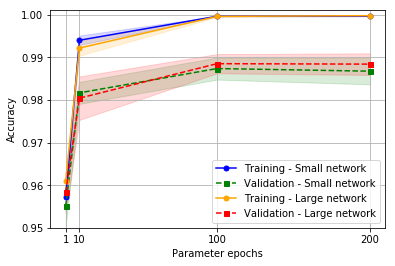

In [44]:
plot_validation_curves(
    small_network['mean_train_score'], small_network['std_train_score'], small_network['mean_test_score'], small_network['std_test_score'],
    large_network['mean_train_score'], large_network['std_train_score'], large_network['mean_test_score'], large_network['std_test_score'], 
    'epochs', param_grid['epochs'], ylim=[.95, 1.001]
)

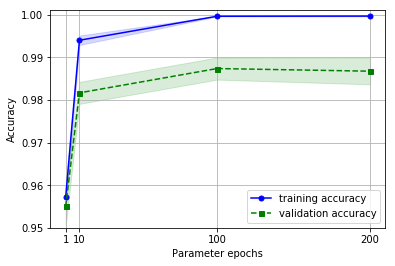

In [23]:
plot_validation_curve(small_network['mean_train_score'], small_network['std_train_score'], small_network['mean_test_score'], small_network['std_test_score'], 'epochs', param_grid['epochs'], ylim=[.95, 1.001])

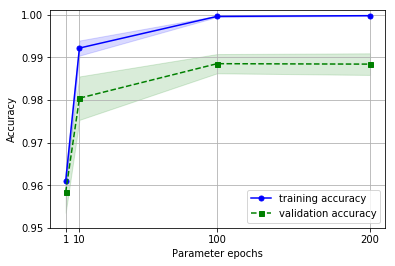

In [24]:
plot_validation_curve(large_network['mean_train_score'], large_network['std_train_score'], large_network['mean_test_score'], large_network['std_test_score'], 'epochs', param_grid['epochs'], ylim=[.95, 1.001])

In [25]:
import scipy.stats

In [26]:
scipy.stats.describe(res['mean_fit_time'])

DescribeResult(nobs=8, minmax=(7.0968981385231018, 1347.3175880908966), mean=507.4211999475956, variance=301313.84901024203, skewness=0.4538700369896247, kurtosis=-1.374516402513797)

In [27]:
scipy.stats.describe(res['mean_score_time'])

DescribeResult(nobs=8, minmax=(0.44024604558944702, 0.64651650190353394), mean=0.54489114135503769, variance=0.0045870502771713385, skewness=0.10915589525298657, kurtosis=-0.9125612122053317)

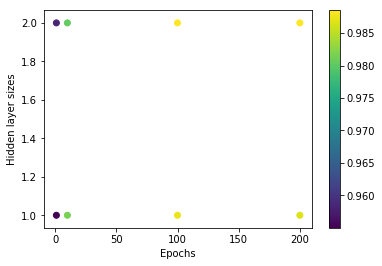

In [32]:
y = np.asarray([1,2,1,2,1,2,1,2])
yticks = ['(10,10)', '(100,100)']
x = np.asarray([1,1,10,10,100,100,200,200])

plt.scatter(x, y, c=res['mean_test_score'])
plt.xlabel('Epochs')
plt.ylabel('Hidden layer sizes')
plt.colorbar()
plt.show()

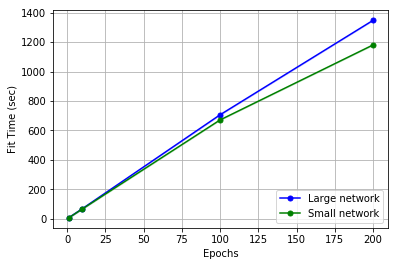

In [36]:
fig, ax = plt.subplots()

ax.plot(param_grid['epochs'], large_network['mean_fit_time'],
      color='blue', marker='o',
      markersize=5, label='Large network')
ax.fill_between(param_grid['epochs'],
              large_network['mean_fit_time'] + large_network['std_fit_time'],
              large_network['mean_fit_time'] - large_network['std_fit_time'],
              alpha=0.15, color='blue')

ax.plot(param_grid['epochs'], small_network['mean_fit_time'],
      color='green', marker='o',
      markersize=5, label='Small network')
ax.fill_between(param_grid['epochs'],
              small_network['mean_fit_time'] + small_network['std_fit_time'],
              small_network['mean_fit_time'] - small_network['std_fit_time'],
              alpha=0.15, color='green')

plt.grid()
plt.legend(loc='lower right')
ax.set_ylabel('Fit Time (sec)')
plt.xlabel('Epochs')
plt.show()

In [45]:
sorted(res['mean_fit_time'])

[7.0968981385231018,
 8.1041227579116821,
 68.11360239982605,
 69.926440596580505,
 671.64845538139343,
 706.62718218564987,
 1180.5353100299835,
 1347.3175880908966]

In [46]:
# The large network takes about 2.5-3 more minutes to train. I'll still choose it as the best learner

## Learning Curves for best learner

Epoch 1/200
723/723 [==============================] - 0s 421us/step - loss: 0.2390 - acc: 0.6266
Epoch 2/200
723/723 [==============================] - 0s 326us/step - loss: 0.1961 - acc: 0.8797
Epoch 3/200
723/723 [==============================] - 0s 333us/step - loss: 0.1406 - acc: 0.9267
Epoch 4/200
723/723 [==============================] - 0s 358us/step - loss: 0.0917 - acc: 0.9530
Epoch 5/200
723/723 [==============================] - 0s 384us/step - loss: 0.0632 - acc: 0.9571
Epoch 6/200
723/723 [==============================] - 0s 343us/step - loss: 0.0483 - acc: 0.9613
Epoch 7/200
723/723 [==============================] - 0s 335us/step - loss: 0.0399 - acc: 0.9613
Epoch 8/200
723/723 [==============================] - 0s 337us/step - loss: 0.0340 - acc: 0.9668
Epoch 9/200
723/723 [==============================] - 0s 346us/step - loss: 0.0303 - acc: 0.9737
Epoch 10/200
723/723 [==============================] - 0s 386us/step - loss: 0.0276 - acc: 0.9779
Epoch 11/200
723/72

723/723 [==============================] - 0s 315us/step - loss: 1.8263e-04 - acc: 1.0000
Epoch 162/200
723/723 [==============================] - 0s 316us/step - loss: 1.8080e-04 - acc: 1.0000
Epoch 163/200
723/723 [==============================] - 0s 301us/step - loss: 1.7903e-04 - acc: 1.0000
Epoch 164/200
723/723 [==============================] - 0s 349us/step - loss: 1.7709e-04 - acc: 1.0000
Epoch 165/200
723/723 [==============================] - 0s 303us/step - loss: 1.7596e-04 - acc: 1.0000
Epoch 166/200
723/723 [==============================] - 0s 322us/step - loss: 1.7412e-04 - acc: 1.0000
Epoch 167/200
723/723 [==============================] - 0s 394us/step - loss: 1.7238e-04 - acc: 1.0000
Epoch 168/200
723/723 [==============================] - 0s 305us/step - loss: 1.7021e-04 - acc: 1.0000
Epoch 169/200
723/723 [==============================] - 0s 332us/step - loss: 1.6881e-04 - acc: 1.0000
Epoch 170/200
723/723 [==============================] - 0s 329us/step - loss:

1447/1447 [==============================] - 0s 283us/step - loss: 0.0032 - acc: 0.9979
Epoch 41/200
1447/1447 [==============================] - 0s 328us/step - loss: 0.0031 - acc: 0.9979
Epoch 42/200
1447/1447 [==============================] - 1s 350us/step - loss: 0.0031 - acc: 0.9979
Epoch 43/200
1447/1447 [==============================] - 0s 318us/step - loss: 0.0030 - acc: 0.9979
Epoch 44/200
1447/1447 [==============================] - 1s 378us/step - loss: 0.0029 - acc: 0.9979
Epoch 45/200
1447/1447 [==============================] - 0s 299us/step - loss: 0.0029 - acc: 0.9979
Epoch 46/200
1447/1447 [==============================] - 0s 254us/step - loss: 0.0029 - acc: 0.9979
Epoch 47/200
1447/1447 [==============================] - 0s 250us/step - loss: 0.0028 - acc: 0.9979
Epoch 48/200
1447/1447 [==============================] - 0s 290us/step - loss: 0.0028 - acc: 0.9979
Epoch 49/200
1447/1447 [==============================] - 0s 302us/step - loss: 0.0027 - acc: 0.9979
Epo

1447/1447 [==============================] - 0s 315us/step - loss: 7.6040e-04 - acc: 0.9993
Epoch 197/200
1447/1447 [==============================] - 0s 287us/step - loss: 7.5990e-04 - acc: 0.9993
Epoch 198/200
1447/1447 [==============================] - 0s 293us/step - loss: 7.5932e-04 - acc: 0.9993
Epoch 199/200
1447/1447 [==============================] - 0s 293us/step - loss: 7.5886e-04 - acc: 0.9993
Epoch 200/200
1447/1447 [==============================] - 0s 65us/step
Epoch 1/200
2170/2170 [==============================] - 1s 326us/step - loss: 0.1804 - acc: 0.7931
Epoch 2/200
2170/2170 [==============================] - 1s 289us/step - loss: 0.0656 - acc: 0.9415
Epoch 3/200
2170/2170 [==============================] - 1s 288us/step - loss: 0.0413 - acc: 0.9558
Epoch 4/200
2170/2170 [==============================] - 1s 274us/step - loss: 0.0329 - acc: 0.9622
Epoch 5/200
2170/2170 [==============================] - 1s 278us/step - loss: 0.0289 - acc: 0.9645
Epoch 6/200
2170/2

2170/2170 [==============================] - 1s 287us/step - loss: 6.9358e-04 - acc: 0.9995
Epoch 76/200
2170/2170 [==============================] - 1s 270us/step - loss: 6.8602e-04 - acc: 0.9995
Epoch 77/200
2170/2170 [==============================] - 1s 289us/step - loss: 6.7939e-04 - acc: 0.9995
Epoch 78/200
2170/2170 [==============================] - 1s 291us/step - loss: 6.7519e-04 - acc: 0.9995
Epoch 79/200
2170/2170 [==============================] - 1s 266us/step - loss: 6.6886e-04 - acc: 0.9995
Epoch 80/200
2170/2170 [==============================] - 1s 275us/step - loss: 6.6493e-04 - acc: 0.9995
Epoch 81/200
2170/2170 [==============================] - 1s 288us/step - loss: 6.5977e-04 - acc: 0.9995
Epoch 82/200
2170/2170 [==============================] - 1s 269us/step - loss: 6.5543e-04 - acc: 0.9995
Epoch 83/200
2170/2170 [==============================] - 1s 273us/step - loss: 6.5108e-04 - acc: 0.9995
Epoch 84/200
2170/2170 [==============================] - 1s 264us/s

2894/2894 [==============================] - 1s 281us/step - loss: 0.0028 - acc: 0.9983
Epoch 30/200
2894/2894 [==============================] - 1s 289us/step - loss: 0.0026 - acc: 0.9986
Epoch 31/200
2894/2894 [==============================] - 1s 280us/step - loss: 0.0025 - acc: 0.9986
Epoch 32/200
2894/2894 [==============================] - 1s 281us/step - loss: 0.0023 - acc: 0.9990
Epoch 33/200
2894/2894 [==============================] - 1s 274us/step - loss: 0.0022 - acc: 0.9990
Epoch 34/200
2894/2894 [==============================] - 1s 274us/step - loss: 0.0021 - acc: 0.9990
Epoch 35/200
2894/2894 [==============================] - 1s 277us/step - loss: 0.0020 - acc: 0.9990
Epoch 36/200
2894/2894 [==============================] - 1s 253us/step - loss: 0.0019 - acc: 0.9990
Epoch 37/200
2894/2894 [==============================] - 1s 269us/step - loss: 0.0018 - acc: 0.9990
Epoch 38/200
2894/2894 [==============================] - 1s 284us/step - loss: 0.0018 - acc: 0.9990
Epo

2894/2894 [==============================] - 1s 281us/step - loss: 3.8354e-04 - acc: 0.9997
Epoch 185/200
2894/2894 [==============================] - 1s 278us/step - loss: 3.8319e-04 - acc: 0.9997
Epoch 186/200
2894/2894 [==============================] - 1s 283us/step - loss: 3.8289e-04 - acc: 0.9997
Epoch 187/200
2894/2894 [==============================] - 1s 284us/step - loss: 3.8269e-04 - acc: 0.9997
Epoch 188/200
2894/2894 [==============================] - 1s 271us/step - loss: 3.8228e-04 - acc: 0.9997
Epoch 189/200
2894/2894 [==============================] - 1s 273us/step - loss: 3.8207e-04 - acc: 0.9997
Epoch 190/200
2894/2894 [==============================] - 1s 277us/step - loss: 3.8187e-04 - acc: 0.9997
Epoch 191/200
2894/2894 [==============================] - 1s 274us/step - loss: 3.8159e-04 - acc: 0.9997
Epoch 192/200
2894/2894 [==============================] - 1s 283us/step - loss: 3.8123e-04 - acc: 0.9997
Epoch 193/200
2894/2894 [==============================] - 1

3617/3617 [==============================] - 1s 279us/step - loss: 5.9770e-04 - acc: 0.9994
Epoch 140/200
3617/3617 [==============================] - 1s 271us/step - loss: 5.9833e-04 - acc: 0.9994
Epoch 141/200
3617/3617 [==============================] - 1s 274us/step - loss: 5.9711e-04 - acc: 0.9994
Epoch 142/200
3617/3617 [==============================] - 1s 288us/step - loss: 5.9650e-04 - acc: 0.9994
Epoch 143/200
3617/3617 [==============================] - 1s 318us/step - loss: 5.9601e-04 - acc: 0.9994
Epoch 144/200
3617/3617 [==============================] - 1s 357us/step - loss: 5.9557e-04 - acc: 0.9994
Epoch 145/200
3617/3617 [==============================] - 2s 459us/step - loss: 5.9511e-04 - acc: 0.9994
Epoch 146/200
3617/3617 [==============================] - 1s 383us/step - loss: 5.9466e-04 - acc: 0.9994
Epoch 147/200
3617/3617 [==============================] - 1s 325us/step - loss: 5.9426e-04 - acc: 0.9994
Epoch 148/200
3617/3617 [==============================] - 1

4341/4341 [==============================] - 1s 268us/step - loss: 0.0064 - acc: 0.9945
Epoch 17/200
4341/4341 [==============================] - 1s 270us/step - loss: 0.0060 - acc: 0.9952
Epoch 18/200
4341/4341 [==============================] - 1s 277us/step - loss: 0.0052 - acc: 0.9963
Epoch 19/200
4341/4341 [==============================] - 1s 273us/step - loss: 0.0048 - acc: 0.9963
Epoch 20/200
4341/4341 [==============================] - 1s 282us/step - loss: 0.0045 - acc: 0.9970
Epoch 21/200
4341/4341 [==============================] - 1s 276us/step - loss: 0.0041 - acc: 0.9972
Epoch 22/200
4341/4341 [==============================] - 1s 280us/step - loss: 0.0035 - acc: 0.9977
Epoch 23/200
4341/4341 [==============================] - 1s 270us/step - loss: 0.0033 - acc: 0.9979
Epoch 24/200
4341/4341 [==============================] - 1s 276us/step - loss: 0.0030 - acc: 0.9982
Epoch 25/200
4341/4341 [==============================] - 1s 284us/step - loss: 0.0027 - acc: 0.9979
Epo

4341/4341 [==============================] - 1s 288us/step - loss: 2.5857e-04 - acc: 0.9998
Epoch 172/200
4341/4341 [==============================] - 1s 293us/step - loss: 2.5834e-04 - acc: 0.9998
Epoch 173/200
4341/4341 [==============================] - 1s 280us/step - loss: 2.5807e-04 - acc: 0.9998
Epoch 174/200
4341/4341 [==============================] - 1s 269us/step - loss: 2.5787e-04 - acc: 0.9998
Epoch 175/200
4341/4341 [==============================] - 1s 254us/step - loss: 2.5762e-04 - acc: 0.9998
Epoch 176/200
4341/4341 [==============================] - 1s 272us/step - loss: 2.5745e-04 - acc: 0.9998
Epoch 177/200
4341/4341 [==============================] - 1s 285us/step - loss: 2.5715e-04 - acc: 0.9998
Epoch 178/200
4341/4341 [==============================] - 1s 269us/step - loss: 2.5694e-04 - acc: 0.9998
Epoch 179/200
4341/4341 [==============================] - 1s 286us/step - loss: 2.5676e-04 - acc: 0.9998
Epoch 180/200
4341/4341 [==============================] - 1

5064/5064 [==============================] - 1s 242us/step - loss: 6.3106e-04 - acc: 0.9994
Epoch 128/200
5064/5064 [==============================] - 1s 262us/step - loss: 6.3042e-04 - acc: 0.9994
Epoch 129/200
5064/5064 [==============================] - 1s 261us/step - loss: 6.2989e-04 - acc: 0.9994
Epoch 130/200
5064/5064 [==============================] - 1s 280us/step - loss: 6.2934e-04 - acc: 0.9994
Epoch 131/200
5064/5064 [==============================] - 1s 274us/step - loss: 6.2902e-04 - acc: 0.9994
Epoch 132/200
5064/5064 [==============================] - 1s 259us/step - loss: 6.2856e-04 - acc: 0.9994
Epoch 133/200
5064/5064 [==============================] - 1s 248us/step - loss: 6.2807e-04 - acc: 0.9994
Epoch 134/200
5064/5064 [==============================] - 1s 264us/step - loss: 6.2758e-04 - acc: 0.9994
Epoch 135/200
5064/5064 [==============================] - 1s 268us/step - loss: 6.2722e-04 - acc: 0.9994
Epoch 136/200
5064/5064 [==============================] - 1

5788/5788 [==============================] - 2s 266us/step - loss: 7.5736e-04 - acc: 0.9993
Epoch 84/200
5788/5788 [==============================] - 2s 263us/step - loss: 7.5600e-04 - acc: 0.9993
Epoch 85/200
5788/5788 [==============================] - 2s 264us/step - loss: 7.5421e-04 - acc: 0.9993
Epoch 86/200
5788/5788 [==============================] - 2s 261us/step - loss: 7.5345e-04 - acc: 0.9993
Epoch 87/200
5788/5788 [==============================] - 2s 274us/step - loss: 7.5232e-04 - acc: 0.9993
Epoch 88/200
5788/5788 [==============================] - 2s 280us/step - loss: 7.5127e-04 - acc: 0.9993
Epoch 89/200
5788/5788 [==============================] - 2s 268us/step - loss: 7.4954e-04 - acc: 0.9993
Epoch 90/200
5788/5788 [==============================] - 2s 273us/step - loss: 7.4820e-04 - acc: 0.9993
Epoch 91/200
5788/5788 [==============================] - 2s 270us/step - loss: 7.4767e-04 - acc: 0.9993
Epoch 92/200
5788/5788 [==============================] - 2s 279us/s

6511/6511 [==============================] - 2s 266us/step - loss: 0.0010 - acc: 0.9992
Epoch 38/200
6511/6511 [==============================] - 2s 271us/step - loss: 9.5582e-04 - acc: 0.9992
Epoch 39/200
6511/6511 [==============================] - 2s 267us/step - loss: 8.9906e-04 - acc: 0.9994
Epoch 40/200
6511/6511 [==============================] - 2s 280us/step - loss: 8.6215e-04 - acc: 0.9994
Epoch 41/200
6511/6511 [==============================] - 2s 260us/step - loss: 8.4666e-04 - acc: 0.9994
Epoch 42/200
6511/6511 [==============================] - 2s 261us/step - loss: 8.2716e-04 - acc: 0.9994
Epoch 43/200
6511/6511 [==============================] - 2s 276us/step - loss: 8.1582e-04 - acc: 0.9994
Epoch 44/200
6511/6511 [==============================] - 2s 269us/step - loss: 7.9842e-04 - acc: 0.9994
Epoch 45/200
6511/6511 [==============================] - 2s 264us/step - loss: 7.9209e-04 - acc: 0.9994
Epoch 46/200
6511/6511 [==============================] - 2s 243us/step 

6511/6511 [==============================] - 2s 297us/step - loss: 3.7806e-04 - acc: 0.9997
Epoch 116/200
6511/6511 [==============================] - 2s 302us/step - loss: 3.6889e-04 - acc: 0.9997
Epoch 117/200
6511/6511 [==============================] - 2s 290us/step - loss: 3.6476e-04 - acc: 0.9997
Epoch 118/200
6511/6511 [==============================] - 2s 343us/step - loss: 3.6581e-04 - acc: 0.9997
Epoch 119/200
6511/6511 [==============================] - 2s 326us/step - loss: 3.5898e-04 - acc: 0.9997
Epoch 120/200
6511/6511 [==============================] - 2s 264us/step - loss: 3.5843e-04 - acc: 0.9997
Epoch 121/200
6511/6511 [==============================] - 2s 257us/step - loss: 3.5636e-04 - acc: 0.9997
Epoch 122/200
6511/6511 [==============================] - 2s 328us/step - loss: 3.5572e-04 - acc: 0.9997
Epoch 123/200
6511/6511 [==============================] - 2s 287us/step - loss: 3.5353e-04 - acc: 0.9997
Epoch 124/200
6511/6511 [==============================] - 2

7235/7235 [==============================] - 2s 284us/step - loss: 4.7750e-04 - acc: 0.9996
Epoch 71/200
7235/7235 [==============================] - 2s 280us/step - loss: 4.7567e-04 - acc: 0.9996
Epoch 72/200
7235/7235 [==============================] - 2s 290us/step - loss: 4.7431e-04 - acc: 0.9996
Epoch 73/200
7235/7235 [==============================] - 2s 282us/step - loss: 4.7100e-04 - acc: 0.9996
Epoch 74/200
7235/7235 [==============================] - 2s 286us/step - loss: 4.6954e-04 - acc: 0.9996
Epoch 75/200
7235/7235 [==============================] - 2s 305us/step - loss: 4.6669e-04 - acc: 0.9996
Epoch 76/200
7235/7235 [==============================] - 2s 310us/step - loss: 4.6362e-04 - acc: 0.9996
Epoch 77/200
7235/7235 [==============================] - 2s 304us/step - loss: 4.5810e-04 - acc: 0.9996
Epoch 78/200
7235/7235 [==============================] - 2s 289us/step - loss: 4.4548e-04 - acc: 0.9996
Epoch 79/200
7235/7235 [==============================] - 2s 293us/s

Epoch 25/200
723/723 [==============================] - 0s 312us/step - loss: 0.0099 - acc: 0.9945
Epoch 26/200
723/723 [==============================] - 0s 291us/step - loss: 0.0091 - acc: 0.9972
Epoch 27/200
723/723 [==============================] - 0s 288us/step - loss: 0.0085 - acc: 0.9972
Epoch 28/200
723/723 [==============================] - 0s 282us/step - loss: 0.0078 - acc: 0.9986
Epoch 29/200
723/723 [==============================] - 0s 316us/step - loss: 0.0073 - acc: 0.9986
Epoch 30/200
723/723 [==============================] - 0s 323us/step - loss: 0.0067 - acc: 0.9972
Epoch 31/200
723/723 [==============================] - 0s 292us/step - loss: 0.0064 - acc: 0.9986
Epoch 32/200
723/723 [==============================] - 0s 296us/step - loss: 0.0060 - acc: 0.9986
Epoch 33/200
723/723 [==============================] - 0s 295us/step - loss: 0.0059 - acc: 0.9986
Epoch 34/200
723/723 [==============================] - 0s 385us/step - loss: 0.0053 - acc: 0.9986
Epoch 35/2

723/723 [==============================] - 0s 320us/step - loss: 1.4723e-04 - acc: 1.0000
Epoch 184/200
723/723 [==============================] - 0s 388us/step - loss: 1.4610e-04 - acc: 1.0000
Epoch 185/200
723/723 [==============================] - 0s 295us/step - loss: 1.4499e-04 - acc: 1.0000
Epoch 186/200
723/723 [==============================] - 0s 264us/step - loss: 1.4357e-04 - acc: 1.0000
Epoch 187/200
723/723 [==============================] - 0s 270us/step - loss: 1.4274e-04 - acc: 1.0000
Epoch 188/200
723/723 [==============================] - 0s 274us/step - loss: 1.4129e-04 - acc: 1.0000
Epoch 189/200
723/723 [==============================] - 0s 219us/step - loss: 1.4059e-04 - acc: 1.0000
Epoch 190/200
723/723 [==============================] - 0s 268us/step - loss: 1.3933e-04 - acc: 1.0000
Epoch 191/200
723/723 [==============================] - 0s 272us/step - loss: 1.3795e-04 - acc: 1.0000
Epoch 192/200
723/723 [==============================] - 0s 296us/step - loss:

1447/1447 [==============================] - 1s 366us/step - loss: 1.1550e-04 - acc: 1.0000
Epoch 140/200
1447/1447 [==============================] - 1s 378us/step - loss: 1.1410e-04 - acc: 1.0000
Epoch 141/200
1447/1447 [==============================] - 1s 442us/step - loss: 1.1293e-04 - acc: 1.0000
Epoch 142/200
1447/1447 [==============================] - 1s 365us/step - loss: 1.1201e-04 - acc: 1.0000
Epoch 143/200
1447/1447 [==============================] - 1s 372us/step - loss: 1.1030e-04 - acc: 1.0000
Epoch 144/200
1447/1447 [==============================] - 1s 415us/step - loss: 1.0850e-04 - acc: 1.0000
Epoch 145/200
1447/1447 [==============================] - 0s 314us/step - loss: 1.0788e-04 - acc: 1.0000
Epoch 146/200
1447/1447 [==============================] - 0s 335us/step - loss: 1.0646e-04 - acc: 1.0000
Epoch 147/200
1447/1447 [==============================] - 1s 418us/step - loss: 1.0506e-04 - acc: 1.0000
Epoch 148/200
1447/1447 [==============================] - 0

2170/2170 [==============================] - 1s 273us/step - loss: 0.0092 - acc: 0.9935
Epoch 17/200
2170/2170 [==============================] - 1s 275us/step - loss: 0.0080 - acc: 0.9954
Epoch 18/200
2170/2170 [==============================] - 1s 246us/step - loss: 0.0075 - acc: 0.9949
Epoch 19/200
2170/2170 [==============================] - 1s 324us/step - loss: 0.0068 - acc: 0.9945
Epoch 20/200
2170/2170 [==============================] - 1s 289us/step - loss: 0.0062 - acc: 0.9954
Epoch 21/200
2170/2170 [==============================] - 1s 302us/step - loss: 0.0057 - acc: 0.9963
Epoch 22/200
2170/2170 [==============================] - 1s 298us/step - loss: 0.0052 - acc: 0.9963
Epoch 23/200
2170/2170 [==============================] - 1s 321us/step - loss: 0.0049 - acc: 0.9968
Epoch 24/200
2170/2170 [==============================] - 1s 308us/step - loss: 0.0046 - acc: 0.9972
Epoch 25/200
2170/2170 [==============================] - 1s 320us/step - loss: 0.0043 - acc: 0.9977
Epo

2170/2170 [==============================] - 1s 290us/step - loss: 5.1185e-04 - acc: 0.9995
Epoch 173/200
2170/2170 [==============================] - 1s 312us/step - loss: 5.1129e-04 - acc: 0.9995
Epoch 174/200
2170/2170 [==============================] - 1s 280us/step - loss: 5.1117e-04 - acc: 0.9995
Epoch 175/200
2170/2170 [==============================] - 1s 276us/step - loss: 5.1058e-04 - acc: 0.9995
Epoch 176/200
2170/2170 [==============================] - 1s 269us/step - loss: 5.1016e-04 - acc: 0.9995
Epoch 177/200
2170/2170 [==============================] - 1s 277us/step - loss: 5.0977e-04 - acc: 0.9995
Epoch 178/200
2170/2170 [==============================] - 1s 265us/step - loss: 5.0925e-04 - acc: 0.9995
Epoch 179/200
2170/2170 [==============================] - 1s 271us/step - loss: 5.0897e-04 - acc: 0.9995
Epoch 180/200
2170/2170 [==============================] - 1s 264us/step - loss: 5.0849e-04 - acc: 0.9995
Epoch 181/200
2170/2170 [==============================] - 1

Epoch 128/200
2894/2894 [==============================] - 1s 278us/step - loss: 4.1179e-04 - acc: 0.9997
Epoch 129/200
2894/2894 [==============================] - 1s 276us/step - loss: 4.1100e-04 - acc: 0.9997
Epoch 130/200
2894/2894 [==============================] - 1s 284us/step - loss: 4.1000e-04 - acc: 0.9997
Epoch 131/200
2894/2894 [==============================] - 1s 271us/step - loss: 4.0924e-04 - acc: 0.9997
Epoch 132/200
2894/2894 [==============================] - 1s 288us/step - loss: 4.0840e-04 - acc: 0.9997
Epoch 133/200
2894/2894 [==============================] - 1s 277us/step - loss: 4.0723e-04 - acc: 0.9997
Epoch 134/200
2894/2894 [==============================] - 1s 290us/step - loss: 4.0715e-04 - acc: 0.9997
Epoch 135/200
2894/2894 [==============================] - 1s 235us/step - loss: 4.0629e-04 - acc: 0.9997
Epoch 136/200
2894/2894 [==============================] - 1s 270us/step - loss: 4.0574e-04 - acc: 0.9997
Epoch 137/200
2894/2894 [=====================

3617/3617 [==============================] - 1s 284us/step - loss: 6.6887e-04 - acc: 0.9994
Epoch 85/200
3617/3617 [==============================] - 1s 265us/step - loss: 6.8534e-04 - acc: 0.9994
Epoch 86/200
3617/3617 [==============================] - 1s 300us/step - loss: 6.6337e-04 - acc: 0.9994
Epoch 87/200
3617/3617 [==============================] - 1s 320us/step - loss: 6.5980e-04 - acc: 0.9994
Epoch 88/200
3617/3617 [==============================] - 1s 302us/step - loss: 6.5712e-04 - acc: 0.9994
Epoch 89/200
3617/3617 [==============================] - 1s 314us/step - loss: 6.5420e-04 - acc: 0.9994
Epoch 90/200
3617/3617 [==============================] - 1s 295us/step - loss: 6.5151e-04 - acc: 0.9994
Epoch 91/200
3617/3617 [==============================] - 1s 283us/step - loss: 6.5027e-04 - acc: 0.9994
Epoch 92/200
3617/3617 [==============================] - 1s 326us/step - loss: 6.4735e-04 - acc: 0.9994
Epoch 93/200
3617/3617 [==============================] - 1s 336us/s

4341/4341 [==============================] - 1s 285us/step - loss: 0.0013 - acc: 0.9991
Epoch 40/200
4341/4341 [==============================] - 1s 309us/step - loss: 0.0013 - acc: 0.9991
Epoch 41/200
4341/4341 [==============================] - 2s 346us/step - loss: 0.0013 - acc: 0.9991
Epoch 42/200
4341/4341 [==============================] - 2s 400us/step - loss: 0.0013 - acc: 0.9991
Epoch 43/200
4341/4341 [==============================] - 2s 398us/step - loss: 0.0012 - acc: 0.9991
Epoch 44/200
4341/4341 [==============================] - 1s 338us/step - loss: 0.0012 - acc: 0.9991
Epoch 45/200
4341/4341 [==============================] - 2s 366us/step - loss: 0.0012 - acc: 0.9991
Epoch 46/200
4341/4341 [==============================] - 1s 304us/step - loss: 0.0012 - acc: 0.9991
Epoch 47/200
4341/4341 [==============================] - 1s 272us/step - loss: 0.0012 - acc: 0.9991
Epoch 48/200
4341/4341 [==============================] - 1s 290us/step - loss: 0.0012 - acc: 0.9991
Epo

4341/4341 [==============================] - 1s 296us/step - loss: 7.1366e-04 - acc: 0.9993
Epoch 196/200
4341/4341 [==============================] - 1s 342us/step - loss: 7.1343e-04 - acc: 0.9993
Epoch 197/200
4341/4341 [==============================] - 1s 319us/step - loss: 7.1319e-04 - acc: 0.9993
Epoch 198/200
4341/4341 [==============================] - 1s 331us/step - loss: 7.1311e-04 - acc: 0.9993
Epoch 199/200
4341/4341 [==============================] - 1s 315us/step - loss: 7.1295e-04 - acc: 0.9993
Epoch 200/200
4341/4341 [==============================] - 0s 79us/step
Epoch 1/200
5064/5064 [==============================] - 2s 379us/step - loss: 0.1320 - acc: 0.8732
Epoch 2/200
5064/5064 [==============================] - 2s 328us/step - loss: 0.0388 - acc: 0.9571
Epoch 3/200
5064/5064 [==============================] - 2s 354us/step - loss: 0.0301 - acc: 0.9652
Epoch 4/200
5064/5064 [==============================] - 2s 298us/step - loss: 0.0250 - acc: 0.9712
Epoch 5/200


5064/5064 [==============================] - 2s 329us/step - loss: 4.2531e-04 - acc: 0.9996
Epoch 151/200
5064/5064 [==============================] - 2s 298us/step - loss: 4.2481e-04 - acc: 0.9996
Epoch 152/200
5064/5064 [==============================] - 2s 311us/step - loss: 4.2452e-04 - acc: 0.9996
Epoch 153/200
5064/5064 [==============================] - 2s 308us/step - loss: 4.2428e-04 - acc: 0.9996
Epoch 154/200
5064/5064 [==============================] - 2s 301us/step - loss: 4.2386e-04 - acc: 0.9996
Epoch 155/200
5064/5064 [==============================] - 2s 300us/step - loss: 4.2358e-04 - acc: 0.9996
Epoch 156/200
5064/5064 [==============================] - 2s 314us/step - loss: 4.2329e-04 - acc: 0.9996
Epoch 157/200
5064/5064 [==============================] - 2s 309us/step - loss: 4.2300e-04 - acc: 0.9996
Epoch 158/200
5064/5064 [==============================] - 1s 282us/step - loss: 4.2278e-04 - acc: 0.9996
Epoch 159/200
5064/5064 [==============================] - 2

5788/5788 [==============================] - 2s 294us/step - loss: 3.9300e-04 - acc: 0.9997
Epoch 106/200
5788/5788 [==============================] - 2s 289us/step - loss: 3.9242e-04 - acc: 0.9997
Epoch 107/200
5788/5788 [==============================] - 2s 285us/step - loss: 3.9174e-04 - acc: 0.9997
Epoch 108/200
5788/5788 [==============================] - 2s 302us/step - loss: 3.9076e-04 - acc: 0.9997
Epoch 109/200
5788/5788 [==============================] - 2s 295us/step - loss: 3.9012e-04 - acc: 0.9997
Epoch 110/200
5788/5788 [==============================] - 2s 293us/step - loss: 3.8934e-04 - acc: 0.9997
Epoch 111/200
5788/5788 [==============================] - 2s 301us/step - loss: 3.8879e-04 - acc: 0.9997
Epoch 112/200
5788/5788 [==============================] - 2s 305us/step - loss: 3.8815e-04 - acc: 0.9997
Epoch 113/200
5788/5788 [==============================] - 2s 293us/step - loss: 3.8761e-04 - acc: 0.9997
Epoch 114/200
5788/5788 [==============================] - 2

6511/6511 [==============================] - 2s 281us/step - loss: 3.9169e-04 - acc: 0.9997
Epoch 61/200
6511/6511 [==============================] - 2s 276us/step - loss: 3.6474e-04 - acc: 0.9997
Epoch 62/200
6511/6511 [==============================] - 2s 271us/step - loss: 3.2029e-04 - acc: 0.9998
Epoch 63/200
6511/6511 [==============================] - 2s 280us/step - loss: 3.0144e-04 - acc: 0.9998
Epoch 64/200
6511/6511 [==============================] - 2s 274us/step - loss: 2.9158e-04 - acc: 0.9998
Epoch 65/200
6511/6511 [==============================] - 2s 272us/step - loss: 2.7697e-04 - acc: 0.9998
Epoch 66/200
6511/6511 [==============================] - 2s 275us/step - loss: 2.7413e-04 - acc: 0.9998
Epoch 67/200
6511/6511 [==============================] - 2s 275us/step - loss: 2.6807e-04 - acc: 0.9998
Epoch 68/200
6511/6511 [==============================] - 2s 277us/step - loss: 2.6184e-04 - acc: 0.9998
Epoch 69/200
6511/6511 [==============================] - 2s 296us/s

Epoch 14/200
7235/7235 [==============================] - 2s 290us/step - loss: 0.0054 - acc: 0.9956
Epoch 15/200
7235/7235 [==============================] - 2s 285us/step - loss: 0.0049 - acc: 0.9964
Epoch 16/200
7235/7235 [==============================] - 2s 297us/step - loss: 0.0045 - acc: 0.9967
Epoch 17/200
7235/7235 [==============================] - 2s 293us/step - loss: 0.0040 - acc: 0.9970
Epoch 18/200
7235/7235 [==============================] - 2s 287us/step - loss: 0.0036 - acc: 0.9974
Epoch 19/200
7235/7235 [==============================] - 2s 284us/step - loss: 0.0034 - acc: 0.9975
Epoch 20/200
7235/7235 [==============================] - 2s 299us/step - loss: 0.0031 - acc: 0.9979
Epoch 21/200
7235/7235 [==============================] - 2s 300us/step - loss: 0.0028 - acc: 0.9979
Epoch 22/200
7235/7235 [==============================] - 2s 289us/step - loss: 0.0026 - acc: 0.9979
Epoch 23/200
7235/7235 [==============================] - 2s 291us/step - loss: 0.0023 - ac

7235/7235 [==============================] - 2s 296us/step - loss: 4.3213e-04 - acc: 0.9996
Epoch 170/200
7235/7235 [==============================] - 2s 297us/step - loss: 4.3205e-04 - acc: 0.9996
Epoch 171/200
7235/7235 [==============================] - 2s 250us/step - loss: 4.3184e-04 - acc: 0.9996
Epoch 172/200
7235/7235 [==============================] - 2s 282us/step - loss: 4.3168e-04 - acc: 0.9996
Epoch 173/200
7235/7235 [==============================] - 2s 279us/step - loss: 4.3158e-04 - acc: 0.9996
Epoch 174/200
7235/7235 [==============================] - 2s 285us/step - loss: 4.3139e-04 - acc: 0.9996
Epoch 175/200
7235/7235 [==============================] - 2s 292us/step - loss: 4.3130e-04 - acc: 0.9996
Epoch 176/200
7235/7235 [==============================] - 2s 291us/step - loss: 4.3111e-04 - acc: 0.9996
Epoch 177/200
7235/7235 [==============================] - 2s 295us/step - loss: 4.3096e-04 - acc: 0.9996
Epoch 178/200
7235/7235 [==============================] - 2

723/723 [==============================] - 0s 262us/step - loss: 2.5606e-04 - acc: 1.0000
Epoch 128/200
723/723 [==============================] - 0s 251us/step - loss: 2.5384e-04 - acc: 1.0000
Epoch 129/200
723/723 [==============================] - 0s 287us/step - loss: 2.5105e-04 - acc: 1.0000
Epoch 130/200
723/723 [==============================] - 0s 318us/step - loss: 2.4812e-04 - acc: 1.0000
Epoch 131/200
723/723 [==============================] - 0s 400us/step - loss: 2.4417e-04 - acc: 1.0000
Epoch 132/200
723/723 [==============================] - 0s 297us/step - loss: 2.4167e-04 - acc: 1.0000
Epoch 133/200
723/723 [==============================] - 0s 302us/step - loss: 2.3835e-04 - acc: 1.0000
Epoch 134/200
723/723 [==============================] - 0s 293us/step - loss: 2.3575e-04 - acc: 1.0000
Epoch 135/200
723/723 [==============================] - 0s 297us/step - loss: 2.3255e-04 - acc: 1.0000
Epoch 136/200
723/723 [==============================] - 0s 295us/step - loss:

Epoch 5/200
1447/1447 [==============================] - 0s 287us/step - loss: 0.0404 - acc: 0.9509
Epoch 6/200
1447/1447 [==============================] - 0s 277us/step - loss: 0.0341 - acc: 0.9578
Epoch 7/200
1447/1447 [==============================] - 0s 292us/step - loss: 0.0305 - acc: 0.9668
Epoch 8/200
1447/1447 [==============================] - 0s 291us/step - loss: 0.0275 - acc: 0.9724
Epoch 9/200
1447/1447 [==============================] - 0s 303us/step - loss: 0.0249 - acc: 0.9710
Epoch 10/200
1447/1447 [==============================] - 0s 310us/step - loss: 0.0234 - acc: 0.9730
Epoch 11/200
1447/1447 [==============================] - 0s 286us/step - loss: 0.0214 - acc: 0.9772
Epoch 12/200
1447/1447 [==============================] - 0s 324us/step - loss: 0.0194 - acc: 0.9806
Epoch 13/200
1447/1447 [==============================] - 0s 293us/step - loss: 0.0171 - acc: 0.9848
Epoch 14/200
1447/1447 [==============================] - 0s 291us/step - loss: 0.0160 - acc: 0.

1447/1447 [==============================] - 0s 320us/step - loss: 9.0833e-05 - acc: 1.0000
Epoch 163/200
1447/1447 [==============================] - 0s 297us/step - loss: 8.9856e-05 - acc: 1.0000
Epoch 164/200
1447/1447 [==============================] - 0s 291us/step - loss: 8.8946e-05 - acc: 1.0000
Epoch 165/200
1447/1447 [==============================] - 0s 285us/step - loss: 8.8046e-05 - acc: 1.0000
Epoch 166/200
1447/1447 [==============================] - 0s 283us/step - loss: 8.7477e-05 - acc: 1.0000
Epoch 167/200
1447/1447 [==============================] - 0s 294us/step - loss: 8.6468e-05 - acc: 1.0000
Epoch 168/200
1447/1447 [==============================] - 0s 294us/step - loss: 8.5233e-05 - acc: 1.0000
Epoch 169/200
1447/1447 [==============================] - 0s 293us/step - loss: 8.4496e-05 - acc: 1.0000
Epoch 170/200
1447/1447 [==============================] - 0s 290us/step - loss: 8.3915e-05 - acc: 1.0000
Epoch 171/200
1447/1447 [==============================] - 0

2170/2170 [==============================] - 1s 292us/step - loss: 5.5549e-04 - acc: 0.9995
Epoch 119/200
2170/2170 [==============================] - 1s 286us/step - loss: 5.5473e-04 - acc: 0.9995
Epoch 120/200
2170/2170 [==============================] - 1s 289us/step - loss: 5.5314e-04 - acc: 0.9995
Epoch 121/200
2170/2170 [==============================] - 1s 272us/step - loss: 5.5239e-04 - acc: 0.9995
Epoch 122/200
2170/2170 [==============================] - 1s 274us/step - loss: 5.5086e-04 - acc: 0.9995
Epoch 123/200
2170/2170 [==============================] - 1s 273us/step - loss: 5.4979e-04 - acc: 0.9995
Epoch 124/200
2170/2170 [==============================] - 1s 270us/step - loss: 5.4864e-04 - acc: 0.9995
Epoch 125/200
2170/2170 [==============================] - 1s 274us/step - loss: 5.4751e-04 - acc: 0.9995
Epoch 126/200
2170/2170 [==============================] - 1s 295us/step - loss: 5.4628e-04 - acc: 0.9995
Epoch 127/200
2170/2170 [==============================] - 1

2894/2894 [==============================] - 1s 294us/step - loss: 8.4214e-04 - acc: 0.9993
Epoch 75/200
2894/2894 [==============================] - 1s 306us/step - loss: 8.3816e-04 - acc: 0.9993
Epoch 76/200
2894/2894 [==============================] - 1s 271us/step - loss: 8.3497e-04 - acc: 0.9993
Epoch 77/200
2894/2894 [==============================] - 1s 277us/step - loss: 8.3118e-04 - acc: 0.9993
Epoch 78/200
2894/2894 [==============================] - 1s 282us/step - loss: 8.2771e-04 - acc: 0.9993
Epoch 79/200
2894/2894 [==============================] - 1s 277us/step - loss: 8.2449e-04 - acc: 0.9993
Epoch 80/200
2894/2894 [==============================] - 1s 278us/step - loss: 8.2289e-04 - acc: 0.9993
Epoch 81/200
2894/2894 [==============================] - 1s 271us/step - loss: 8.1916e-04 - acc: 0.9993
Epoch 82/200
2894/2894 [==============================] - 1s 292us/step - loss: 8.1591e-04 - acc: 0.9993
Epoch 83/200
2894/2894 [==============================] - 1s 282us/s

3617/3617 [==============================] - 1s 300us/step - loss: 0.0025 - acc: 0.9983
Epoch 28/200
3617/3617 [==============================] - 1s 272us/step - loss: 0.0024 - acc: 0.9983
Epoch 29/200
3617/3617 [==============================] - 1s 289us/step - loss: 0.0023 - acc: 0.9986
Epoch 30/200
3617/3617 [==============================] - 1s 276us/step - loss: 0.0021 - acc: 0.9986
Epoch 31/200
3617/3617 [==============================] - 1s 276us/step - loss: 0.0020 - acc: 0.9986
Epoch 32/200
3617/3617 [==============================] - 1s 271us/step - loss: 0.0019 - acc: 0.9989
Epoch 33/200
3617/3617 [==============================] - 1s 265us/step - loss: 0.0023 - acc: 0.9986
Epoch 34/200
3617/3617 [==============================] - 1s 268us/step - loss: 0.0017 - acc: 0.9989
Epoch 35/200
3617/3617 [==============================] - 1s 268us/step - loss: 0.0017 - acc: 0.9989
Epoch 36/200
3617/3617 [==============================] - 1s 280us/step - loss: 0.0016 - acc: 0.9989
Epo

3617/3617 [==============================] - 1s 288us/step - loss: 3.0601e-04 - acc: 0.9997
Epoch 183/200
3617/3617 [==============================] - 1s 282us/step - loss: 3.0580e-04 - acc: 0.9997
Epoch 184/200
3617/3617 [==============================] - 1s 290us/step - loss: 3.0558e-04 - acc: 0.9997
Epoch 185/200
3617/3617 [==============================] - 1s 283us/step - loss: 3.0532e-04 - acc: 0.9997
Epoch 186/200
3617/3617 [==============================] - 1s 293us/step - loss: 3.0573e-04 - acc: 0.9997
Epoch 187/200
3617/3617 [==============================] - 1s 296us/step - loss: 3.0493e-04 - acc: 0.9997
Epoch 188/200
3617/3617 [==============================] - 1s 295us/step - loss: 3.0470e-04 - acc: 0.9997
Epoch 189/200
3617/3617 [==============================] - 1s 285us/step - loss: 3.0446e-04 - acc: 0.9997
Epoch 190/200
3617/3617 [==============================] - 1s 296us/step - loss: 3.0419e-04 - acc: 0.9997
Epoch 191/200
3617/3617 [==============================] - 1

4341/4341 [==============================] - 1s 284us/step - loss: 2.7111e-04 - acc: 0.9998
Epoch 138/200
4341/4341 [==============================] - 1s 267us/step - loss: 2.7047e-04 - acc: 0.9998
Epoch 139/200
4341/4341 [==============================] - 1s 270us/step - loss: 2.6989e-04 - acc: 0.9998
Epoch 140/200
4341/4341 [==============================] - 1s 271us/step - loss: 2.6943e-04 - acc: 0.9998
Epoch 141/200
4341/4341 [==============================] - 1s 265us/step - loss: 2.6909e-04 - acc: 0.9998
Epoch 142/200
4341/4341 [==============================] - 1s 266us/step - loss: 2.6853e-04 - acc: 0.9998
Epoch 143/200
4341/4341 [==============================] - 1s 232us/step - loss: 2.6828e-04 - acc: 0.9998
Epoch 144/200
4341/4341 [==============================] - 1s 256us/step - loss: 2.6790e-04 - acc: 0.9998
Epoch 145/200
4341/4341 [==============================] - 1s 269us/step - loss: 2.6741e-04 - acc: 0.9998
Epoch 146/200
4341/4341 [==============================] - 1

5064/5064 [==============================] - 1s 271us/step - loss: 0.0074 - acc: 0.9939
Epoch 15/200
5064/5064 [==============================] - 1s 236us/step - loss: 0.0064 - acc: 0.9945
Epoch 16/200
5064/5064 [==============================] - 1s 256us/step - loss: 0.0060 - acc: 0.9943
Epoch 17/200
5064/5064 [==============================] - 1s 281us/step - loss: 0.0052 - acc: 0.9961
Epoch 18/200
5064/5064 [==============================] - 1s 272us/step - loss: 0.0048 - acc: 0.9955
Epoch 19/200
5064/5064 [==============================] - 1s 268us/step - loss: 0.0040 - acc: 0.9974
Epoch 20/200
5064/5064 [==============================] - 1s 288us/step - loss: 0.0035 - acc: 0.9984
Epoch 21/200
5064/5064 [==============================] - 2s 302us/step - loss: 0.0030 - acc: 0.9984
Epoch 22/200
5064/5064 [==============================] - 1s 294us/step - loss: 0.0026 - acc: 0.9988
Epoch 23/200
5064/5064 [==============================] - 1s 278us/step - loss: 0.0024 - acc: 0.9990
Epo

5064/5064 [==============================] - 1s 288us/step - loss: 6.5264e-04 - acc: 0.9994
Epoch 94/200
5064/5064 [==============================] - 1s 285us/step - loss: 6.5190e-04 - acc: 0.9994
Epoch 95/200
5064/5064 [==============================] - 1s 279us/step - loss: 6.5055e-04 - acc: 0.9994
Epoch 96/200
5064/5064 [==============================] - 1s 257us/step - loss: 6.4945e-04 - acc: 0.9994
Epoch 97/200
5064/5064 [==============================] - 1s 288us/step - loss: 6.4851e-04 - acc: 0.9994
Epoch 98/200
5064/5064 [==============================] - 1s 278us/step - loss: 6.4783e-04 - acc: 0.9994
Epoch 99/200
5064/5064 [==============================] - 1s 281us/step - loss: 6.4701e-04 - acc: 0.9994
Epoch 100/200
5064/5064 [==============================] - 2s 301us/step - loss: 6.4599e-04 - acc: 0.9994
Epoch 101/200
5064/5064 [==============================] - 1s 287us/step - loss: 6.4519e-04 - acc: 0.9994
Epoch 102/200
5064/5064 [==============================] - 1s 278u

5788/5788 [==============================] - 2s 275us/step - loss: 0.0010 - acc: 0.9991
Epoch 49/200
5788/5788 [==============================] - 2s 272us/step - loss: 0.0010 - acc: 0.9991
Epoch 50/200
5788/5788 [==============================] - 2s 281us/step - loss: 0.0010 - acc: 0.9991
Epoch 51/200
5788/5788 [==============================] - 2s 271us/step - loss: 0.0010 - acc: 0.9991
Epoch 52/200
5788/5788 [==============================] - 2s 275us/step - loss: 9.9298e-04 - acc: 0.9991
Epoch 53/200
5788/5788 [==============================] - 2s 276us/step - loss: 9.7910e-04 - acc: 0.9991
Epoch 54/200
5788/5788 [==============================] - 2s 273us/step - loss: 9.2873e-04 - acc: 0.9991
Epoch 55/200
5788/5788 [==============================] - 2s 275us/step - loss: 8.8047e-04 - acc: 0.9993
Epoch 56/200
5788/5788 [==============================] - 2s 279us/step - loss: 8.5896e-04 - acc: 0.9993
Epoch 57/200
5788/5788 [==============================] - 2s 273us/step - loss: 8.49

5788/5788 [==============================] - 2s 274us/step - loss: 5.5134e-04 - acc: 0.9995
Epoch 127/200
5788/5788 [==============================] - 2s 277us/step - loss: 5.5111e-04 - acc: 0.9995
Epoch 128/200
5788/5788 [==============================] - 2s 275us/step - loss: 5.5041e-04 - acc: 0.9995
Epoch 129/200
5788/5788 [==============================] - 2s 276us/step - loss: 5.5002e-04 - acc: 0.9995
Epoch 130/200
5788/5788 [==============================] - 2s 277us/step - loss: 5.4955e-04 - acc: 0.9995
Epoch 131/200
5788/5788 [==============================] - 2s 269us/step - loss: 5.4914e-04 - acc: 0.9995
Epoch 132/200
5788/5788 [==============================] - 2s 268us/step - loss: 5.4828e-04 - acc: 0.9995
Epoch 133/200
5788/5788 [==============================] - 1s 258us/step - loss: 5.4840e-04 - acc: 0.9995
Epoch 134/200
5788/5788 [==============================] - 2s 304us/step - loss: 5.4788e-04 - acc: 0.9995
Epoch 135/200
5788/5788 [==============================] - 2

6511/6511 [==============================] - 2s 307us/step - loss: 4.6852e-04 - acc: 0.9995
Epoch 82/200
6511/6511 [==============================] - 2s 300us/step - loss: 4.1488e-04 - acc: 0.9997
Epoch 83/200
6511/6511 [==============================] - 2s 285us/step - loss: 3.9730e-04 - acc: 0.9997
Epoch 84/200
6511/6511 [==============================] - 2s 289us/step - loss: 3.9106e-04 - acc: 0.9997
Epoch 85/200
6511/6511 [==============================] - 4s 673us/step - loss: 3.8537e-04 - acc: 0.9997
Epoch 86/200
6511/6511 [==============================] - 2s 328us/step - loss: 3.8066e-04 - acc: 0.9997
Epoch 87/200
6511/6511 [==============================] - 2s 300us/step - loss: 3.7792e-04 - acc: 0.9997
Epoch 88/200
6511/6511 [==============================] - 2s 285us/step - loss: 3.7460e-04 - acc: 0.9997
Epoch 89/200
6511/6511 [==============================] - 2s 287us/step - loss: 3.7239e-04 - acc: 0.9997
Epoch 90/200
6511/6511 [==============================] - 2s 295us/s

7235/7235 [==============================] - 2s 289us/step - loss: 7.8970e-04 - acc: 0.9994
Epoch 36/200
7235/7235 [==============================] - 2s 276us/step - loss: 7.6295e-04 - acc: 0.9994
Epoch 37/200
7235/7235 [==============================] - 2s 275us/step - loss: 7.3971e-04 - acc: 0.9994
Epoch 38/200
7235/7235 [==============================] - 2s 281us/step - loss: 7.1802e-04 - acc: 0.9994
Epoch 39/200
7235/7235 [==============================] - 2s 255us/step - loss: 6.8340e-04 - acc: 0.9994
Epoch 40/200
7235/7235 [==============================] - 2s 242us/step - loss: 6.5749e-04 - acc: 0.9996
Epoch 41/200
7235/7235 [==============================] - 2s 265us/step - loss: 6.2247e-04 - acc: 0.9996
Epoch 42/200
7235/7235 [==============================] - 2s 287us/step - loss: 6.0228e-04 - acc: 0.9996
Epoch 43/200
7235/7235 [==============================] - 2s 269us/step - loss: 5.9229e-04 - acc: 0.9996
Epoch 44/200
7235/7235 [==============================] - 2s 278us/s

7235/7235 [==============================] - 2s 283us/step - loss: 3.0725e-04 - acc: 0.9997
Epoch 114/200
7235/7235 [==============================] - 2s 268us/step - loss: 3.0657e-04 - acc: 0.9997
Epoch 115/200
7235/7235 [==============================] - 2s 302us/step - loss: 3.0632e-04 - acc: 0.9997
Epoch 116/200
7235/7235 [==============================] - 2s 290us/step - loss: 3.0580e-04 - acc: 0.9997
Epoch 117/200
7235/7235 [==============================] - 2s 284us/step - loss: 3.0606e-04 - acc: 0.9997
Epoch 118/200
7235/7235 [==============================] - 2s 287us/step - loss: 3.0535e-04 - acc: 0.9997
Epoch 119/200
7235/7235 [==============================] - 2s 278us/step - loss: 3.0468e-04 - acc: 0.9997
Epoch 120/200
7235/7235 [==============================] - 2s 275us/step - loss: 3.0437e-04 - acc: 0.9997
Epoch 121/200
7235/7235 [==============================] - 2s 276us/step - loss: 3.0397e-04 - acc: 0.9997
Epoch 122/200
7235/7235 [==============================] - 2

723/723 [==============================] - 0s 293us/step - loss: 7.1616e-04 - acc: 1.0000
Epoch 71/200
723/723 [==============================] - 0s 288us/step - loss: 7.1483e-04 - acc: 1.0000
Epoch 72/200
723/723 [==============================] - 0s 285us/step - loss: 6.9116e-04 - acc: 1.0000
Epoch 73/200
723/723 [==============================] - 0s 261us/step - loss: 6.6926e-04 - acc: 1.0000
Epoch 74/200
723/723 [==============================] - 0s 276us/step - loss: 6.5610e-04 - acc: 1.0000
Epoch 75/200
723/723 [==============================] - 0s 280us/step - loss: 6.3449e-04 - acc: 1.0000
Epoch 76/200
723/723 [==============================] - 0s 284us/step - loss: 6.1977e-04 - acc: 1.0000
Epoch 77/200
723/723 [==============================] - 0s 278us/step - loss: 6.0163e-04 - acc: 1.0000
Epoch 78/200
723/723 [==============================] - 0s 273us/step - loss: 5.8567e-04 - acc: 1.0000
Epoch 79/200
723/723 [==============================] - 0s 273us/step - loss: 5.7306e-

1447/1447 [==============================] - 0s 280us/step - loss: 0.0052 - acc: 0.9979
Epoch 28/200
1447/1447 [==============================] - 0s 304us/step - loss: 0.0048 - acc: 0.9979
Epoch 29/200
1447/1447 [==============================] - 0s 299us/step - loss: 0.0046 - acc: 0.9979
Epoch 30/200
1447/1447 [==============================] - 0s 301us/step - loss: 0.0043 - acc: 0.9979
Epoch 31/200
1447/1447 [==============================] - 0s 276us/step - loss: 0.0040 - acc: 0.9979
Epoch 32/200
1447/1447 [==============================] - 0s 291us/step - loss: 0.0040 - acc: 0.9979
Epoch 33/200
1447/1447 [==============================] - 0s 275us/step - loss: 0.0038 - acc: 0.9979
Epoch 34/200
1447/1447 [==============================] - 0s 261us/step - loss: 0.0037 - acc: 0.9979
Epoch 35/200
1447/1447 [==============================] - 0s 270us/step - loss: 0.0037 - acc: 0.9979
Epoch 36/200
1447/1447 [==============================] - 0s 263us/step - loss: 0.0034 - acc: 0.9979
Epo

1447/1447 [==============================] - 0s 267us/step - loss: 7.3165e-05 - acc: 1.0000
Epoch 184/200
1447/1447 [==============================] - 0s 271us/step - loss: 7.2104e-05 - acc: 1.0000
Epoch 185/200
1447/1447 [==============================] - 0s 285us/step - loss: 7.1537e-05 - acc: 1.0000
Epoch 186/200
1447/1447 [==============================] - 0s 262us/step - loss: 7.0941e-05 - acc: 1.0000
Epoch 187/200
1447/1447 [==============================] - 0s 272us/step - loss: 7.0153e-05 - acc: 1.0000
Epoch 188/200
1447/1447 [==============================] - 0s 285us/step - loss: 6.9666e-05 - acc: 1.0000
Epoch 189/200
1447/1447 [==============================] - 0s 270us/step - loss: 6.8995e-05 - acc: 1.0000
Epoch 190/200
1447/1447 [==============================] - 0s 275us/step - loss: 6.8364e-05 - acc: 1.0000
Epoch 191/200
1447/1447 [==============================] - 0s 272us/step - loss: 6.7808e-05 - acc: 1.0000
Epoch 192/200
1447/1447 [==============================] - 0

2170/2170 [==============================] - 1s 277us/step - loss: 5.3533e-04 - acc: 0.9995
Epoch 139/200
2170/2170 [==============================] - 1s 284us/step - loss: 5.3487e-04 - acc: 0.9995
Epoch 140/200
2170/2170 [==============================] - 1s 274us/step - loss: 5.3347e-04 - acc: 0.9995
Epoch 141/200
2170/2170 [==============================] - 1s 291us/step - loss: 5.3282e-04 - acc: 0.9995
Epoch 142/200
2170/2170 [==============================] - 1s 248us/step - loss: 5.3205e-04 - acc: 0.9995
Epoch 143/200
2170/2170 [==============================] - 1s 252us/step - loss: 5.3122e-04 - acc: 0.9995
Epoch 144/200
2170/2170 [==============================] - 1s 258us/step - loss: 5.3069e-04 - acc: 0.9995
Epoch 145/200
2170/2170 [==============================] - 1s 259us/step - loss: 5.2978e-04 - acc: 0.9995
Epoch 146/200
2170/2170 [==============================] - 1s 264us/step - loss: 5.2901e-04 - acc: 0.9995
Epoch 147/200
2170/2170 [==============================] - 0

2894/2894 [==============================] - 1s 264us/step - loss: 6.0409e-04 - acc: 0.9993
Epoch 94/200
2894/2894 [==============================] - 1s 266us/step - loss: 5.5108e-04 - acc: 0.9997
Epoch 95/200
2894/2894 [==============================] - 1s 255us/step - loss: 5.3760e-04 - acc: 0.9997
Epoch 96/200
2894/2894 [==============================] - 1s 278us/step - loss: 5.2327e-04 - acc: 0.9997
Epoch 97/200
2894/2894 [==============================] - 1s 222us/step - loss: 5.1066e-04 - acc: 0.9997
Epoch 98/200
2894/2894 [==============================] - 1s 228us/step - loss: 4.9869e-04 - acc: 0.9997
Epoch 99/200
2894/2894 [==============================] - 1s 241us/step - loss: 4.9926e-04 - acc: 0.9997
Epoch 100/200
2894/2894 [==============================] - 1s 232us/step - loss: 4.8839e-04 - acc: 0.9997
Epoch 101/200
2894/2894 [==============================] - 1s 359us/step - loss: 4.8550e-04 - acc: 0.9997
Epoch 102/200
2894/2894 [==============================] - 1s 288u

3617/3617 [==============================] - 1s 227us/step - loss: 0.0014 - acc: 0.9989
Epoch 49/200
3617/3617 [==============================] - 1s 251us/step - loss: 0.0014 - acc: 0.9989
Epoch 50/200
3617/3617 [==============================] - 1s 269us/step - loss: 0.0014 - acc: 0.9989
Epoch 51/200
3617/3617 [==============================] - 1s 307us/step - loss: 0.0013 - acc: 0.9989
Epoch 52/200
3617/3617 [==============================] - 1s 315us/step - loss: 0.0013 - acc: 0.9989
Epoch 53/200
3617/3617 [==============================] - 1s 279us/step - loss: 0.0013 - acc: 0.9989
Epoch 54/200
3617/3617 [==============================] - 1s 226us/step - loss: 0.0013 - acc: 0.9989
Epoch 55/200
3617/3617 [==============================] - 1s 222us/step - loss: 0.0013 - acc: 0.9989
Epoch 56/200
3617/3617 [==============================] - 1s 217us/step - loss: 0.0013 - acc: 0.9989
Epoch 57/200
3617/3617 [==============================] - 1s 224us/step - loss: 0.0013 - acc: 0.9989
Epo

4341/4341 [==============================] - 1s 272us/step - loss: 0.0378 - acc: 0.9613
Epoch 3/200
4341/4341 [==============================] - 1s 263us/step - loss: 0.0285 - acc: 0.9694
Epoch 4/200
4341/4341 [==============================] - 1s 269us/step - loss: 0.0243 - acc: 0.9726
Epoch 5/200
4341/4341 [==============================] - 1s 274us/step - loss: 0.0211 - acc: 0.9770
Epoch 6/200
4341/4341 [==============================] - 1s 282us/step - loss: 0.0186 - acc: 0.9790
Epoch 7/200
4341/4341 [==============================] - 1s 277us/step - loss: 0.0167 - acc: 0.9813
Epoch 8/200
4341/4341 [==============================] - 1s 287us/step - loss: 0.0150 - acc: 0.9848
Epoch 9/200
4341/4341 [==============================] - 1s 276us/step - loss: 0.0133 - acc: 0.9855
Epoch 10/200
4341/4341 [==============================] - 1s 272us/step - loss: 0.0119 - acc: 0.9885
Epoch 11/200
4341/4341 [==============================] - 1s 292us/step - loss: 0.0105 - acc: 0.9885
Epoch 12/2

4341/4341 [==============================] - 1s 268us/step - loss: 2.6214e-04 - acc: 0.9998
Epoch 159/200
4341/4341 [==============================] - 1s 272us/step - loss: 2.6181e-04 - acc: 0.9998
Epoch 160/200
4341/4341 [==============================] - 1s 271us/step - loss: 2.6153e-04 - acc: 0.9998
Epoch 161/200
4341/4341 [==============================] - 1s 275us/step - loss: 2.6129e-04 - acc: 0.9998
Epoch 162/200
4341/4341 [==============================] - 1s 266us/step - loss: 2.6098e-04 - acc: 0.9998
Epoch 163/200
4341/4341 [==============================] - 1s 335us/step - loss: 2.6065e-04 - acc: 0.9998
Epoch 164/200
4341/4341 [==============================] - 1s 278us/step - loss: 2.6044e-04 - acc: 0.9998
Epoch 165/200
4341/4341 [==============================] - 1s 269us/step - loss: 2.6009e-04 - acc: 0.9998
Epoch 166/200
4341/4341 [==============================] - 1s 273us/step - loss: 2.5983e-04 - acc: 0.9998
Epoch 167/200
4341/4341 [==============================] - 1

5064/5064 [==============================] - 1s 264us/step - loss: 0.0010 - acc: 0.9994
Epoch 37/200
5064/5064 [==============================] - 1s 265us/step - loss: 0.0010 - acc: 0.9994
Epoch 38/200
5064/5064 [==============================] - 1s 264us/step - loss: 9.6228e-04 - acc: 0.9994
Epoch 39/200
5064/5064 [==============================] - 1s 259us/step - loss: 9.3523e-04 - acc: 0.9994
Epoch 40/200
5064/5064 [==============================] - 1s 255us/step - loss: 9.1540e-04 - acc: 0.9994
Epoch 41/200
5064/5064 [==============================] - 1s 264us/step - loss: 8.8781e-04 - acc: 0.9994
Epoch 42/200
5064/5064 [==============================] - 1s 263us/step - loss: 8.7358e-04 - acc: 0.9994
Epoch 43/200
5064/5064 [==============================] - 1s 291us/step - loss: 8.5830e-04 - acc: 0.9994
Epoch 44/200
5064/5064 [==============================] - 1s 274us/step - loss: 8.4643e-04 - acc: 0.9994
Epoch 45/200
5064/5064 [==============================] - 1s 294us/step - lo

5064/5064 [==============================] - 1s 269us/step - loss: 6.3562e-04 - acc: 0.9994
Epoch 115/200
5064/5064 [==============================] - 1s 266us/step - loss: 6.3490e-04 - acc: 0.9994
Epoch 116/200
5064/5064 [==============================] - 1s 269us/step - loss: 6.3435e-04 - acc: 0.9994
Epoch 117/200
5064/5064 [==============================] - 1s 272us/step - loss: 6.3385e-04 - acc: 0.9994
Epoch 118/200
5064/5064 [==============================] - 1s 280us/step - loss: 6.3335e-04 - acc: 0.9994
Epoch 119/200
5064/5064 [==============================] - 1s 270us/step - loss: 6.3266e-04 - acc: 0.9994
Epoch 120/200
5064/5064 [==============================] - 1s 295us/step - loss: 6.3209e-04 - acc: 0.9994
Epoch 121/200
5064/5064 [==============================] - 1s 265us/step - loss: 6.3149e-04 - acc: 0.9994
Epoch 122/200
5064/5064 [==============================] - 1s 269us/step - loss: 6.3102e-04 - acc: 0.9994
Epoch 123/200
5064/5064 [==============================] - 1

5788/5788 [==============================] - 2s 262us/step - loss: 4.4010e-04 - acc: 0.9997
Epoch 70/200
5788/5788 [==============================] - 2s 274us/step - loss: 4.3845e-04 - acc: 0.9997
Epoch 71/200
5788/5788 [==============================] - 1s 254us/step - loss: 4.3580e-04 - acc: 0.9997
Epoch 72/200
5788/5788 [==============================] - 1s 229us/step - loss: 4.3295e-04 - acc: 0.9997
Epoch 73/200
5788/5788 [==============================] - 1s 259us/step - loss: 4.3080e-04 - acc: 0.9997
Epoch 74/200
5788/5788 [==============================] - 1s 255us/step - loss: 4.2841e-04 - acc: 0.9997
Epoch 75/200
5788/5788 [==============================] - 2s 266us/step - loss: 4.2667e-04 - acc: 0.9997
Epoch 76/200
5788/5788 [==============================] - 1s 258us/step - loss: 4.2459e-04 - acc: 0.9997
Epoch 77/200
5788/5788 [==============================] - 2s 264us/step - loss: 4.2283e-04 - acc: 0.9997
Epoch 78/200
5788/5788 [==============================] - 2s 260us/s

6511/6511 [==============================] - 2s 272us/step - loss: 0.0021 - acc: 0.9986
Epoch 24/200
6511/6511 [==============================] - 2s 266us/step - loss: 0.0020 - acc: 0.9989
Epoch 25/200
6511/6511 [==============================] - 2s 281us/step - loss: 0.0018 - acc: 0.9988
Epoch 26/200
6511/6511 [==============================] - 2s 271us/step - loss: 0.0017 - acc: 0.9989
Epoch 27/200
6511/6511 [==============================] - 2s 278us/step - loss: 0.0016 - acc: 0.9989
Epoch 28/200
6511/6511 [==============================] - 2s 269us/step - loss: 0.0015 - acc: 0.9989
Epoch 29/200
6511/6511 [==============================] - 2s 262us/step - loss: 0.0014 - acc: 0.9989
Epoch 30/200
6511/6511 [==============================] - 2s 283us/step - loss: 0.0014 - acc: 0.9991
Epoch 31/200
6511/6511 [==============================] - 2s 272us/step - loss: 0.0012 - acc: 0.9991
Epoch 32/200
6511/6511 [==============================] - 2s 271us/step - loss: 0.0012 - acc: 0.9992
Epo

6511/6511 [==============================] - 2s 271us/step - loss: 4.7888e-04 - acc: 0.9995
Epoch 179/200
6511/6511 [==============================] - 2s 262us/step - loss: 4.7871e-04 - acc: 0.9995
Epoch 180/200
6511/6511 [==============================] - 2s 264us/step - loss: 4.7860e-04 - acc: 0.9995
Epoch 181/200
6511/6511 [==============================] - 2s 261us/step - loss: 4.7843e-04 - acc: 0.9995
Epoch 182/200
6511/6511 [==============================] - 2s 257us/step - loss: 4.7829e-04 - acc: 0.9995
Epoch 183/200
6511/6511 [==============================] - 2s 266us/step - loss: 4.7815e-04 - acc: 0.9995
Epoch 184/200
6511/6511 [==============================] - 2s 263us/step - loss: 4.7803e-04 - acc: 0.9995
Epoch 185/200
6511/6511 [==============================] - 2s 262us/step - loss: 4.7790e-04 - acc: 0.9995
Epoch 186/200
6511/6511 [==============================] - 2s 268us/step - loss: 4.7775e-04 - acc: 0.9995
Epoch 187/200
6511/6511 [==============================] - 2

7235/7235 [==============================] - 2s 258us/step - loss: 5.7368e-04 - acc: 0.9994
Epoch 134/200
7235/7235 [==============================] - 2s 253us/step - loss: 5.7229e-04 - acc: 0.9994
Epoch 135/200
7235/7235 [==============================] - 2s 252us/step - loss: 5.6909e-04 - acc: 0.9994
Epoch 136/200
7235/7235 [==============================] - 2s 256us/step - loss: 5.6526e-04 - acc: 0.9994
Epoch 137/200
7235/7235 [==============================] - 2s 256us/step - loss: 5.2101e-04 - acc: 0.9994
Epoch 138/200
7235/7235 [==============================] - 2s 255us/step - loss: 4.5421e-04 - acc: 0.9996
Epoch 139/200
7235/7235 [==============================] - 2s 253us/step - loss: 4.5011e-04 - acc: 0.9996
Epoch 140/200
7235/7235 [==============================] - 2s 256us/step - loss: 4.4886e-04 - acc: 0.9996
Epoch 141/200
7235/7235 [==============================] - 2s 256us/step - loss: 4.4762e-04 - acc: 0.9996
Epoch 142/200
7235/7235 [==============================] - 2

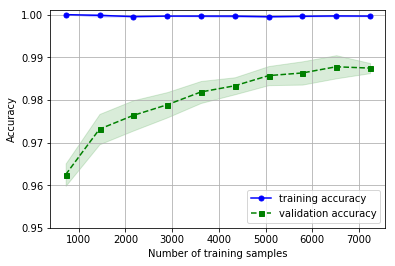

(array([ 723, 1447, 2170, 2894, 3617, 4341, 5064, 5788, 6511, 7235]),
 array([[ 1.        ,  1.        ,  1.        ,  1.        ],
        [ 0.99930891,  1.        ,  1.        ,  1.        ],
        [ 0.99953917,  0.99953917,  0.99953917,  0.99953917],
        [ 0.99965446,  0.99965446,  0.99965446,  0.99965446],
        [ 0.99944706,  0.99972353,  0.99972353,  0.99972353],
        [ 0.99976964,  0.99930891,  0.99976964,  0.99976964],
        [ 0.99940758,  0.99960506,  0.99940758,  0.99960506],
        [ 0.99948169,  0.99965446,  0.99965446,  0.99965446],
        [ 0.99969283,  0.99984641,  0.99969283,  0.99953924],
        [ 0.99972357,  0.99958535,  0.99972357,  0.99958535]]),
 array([[ 0.95978441,  0.96185738,  0.96144279,  0.96681875],
        [ 0.96849088,  0.97222222,  0.973466  ,  0.97843219],
        [ 0.97595357,  0.97470978,  0.97263682,  0.98216508],
        [ 0.97802653,  0.97761194,  0.97595357,  0.98382414],
        [ 0.9800995 ,  0.9805141 ,  0.9805141 ,  0.98631273]

In [6]:
clf = KerasClassifier(build_fn=build_keras_clf, hidden_layer_sizes=(100,100), epochs=200)
gen_and_plot_learning_curve(clf, X_train_scaled, y_train, ylim=[0.95, 1.001], cv=4)